In [2]:
# Import for Pandas and numpy
import pandas as pd
import numpy as np

# Import for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Import for train test split
from sklearn.model_selection import train_test_split

# import for Outlier
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from feature_engine.outliers import Winsorizer

# Import for scaling and encoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder

# Import for Data Balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# Import for Pipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Import for Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

import joblib


from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#Pembuatan dataframe
df = pd.read_csv('data_clean.csv')
df

,index,customer_id,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,...,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_from_last_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.000000,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.000000,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.000000,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.000000,...,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,4,50005,1,0.0,Phone,1,12.0,CC,Male,2.931535,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.000000,...,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.000000,...,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.000000,...,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.000000,...,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


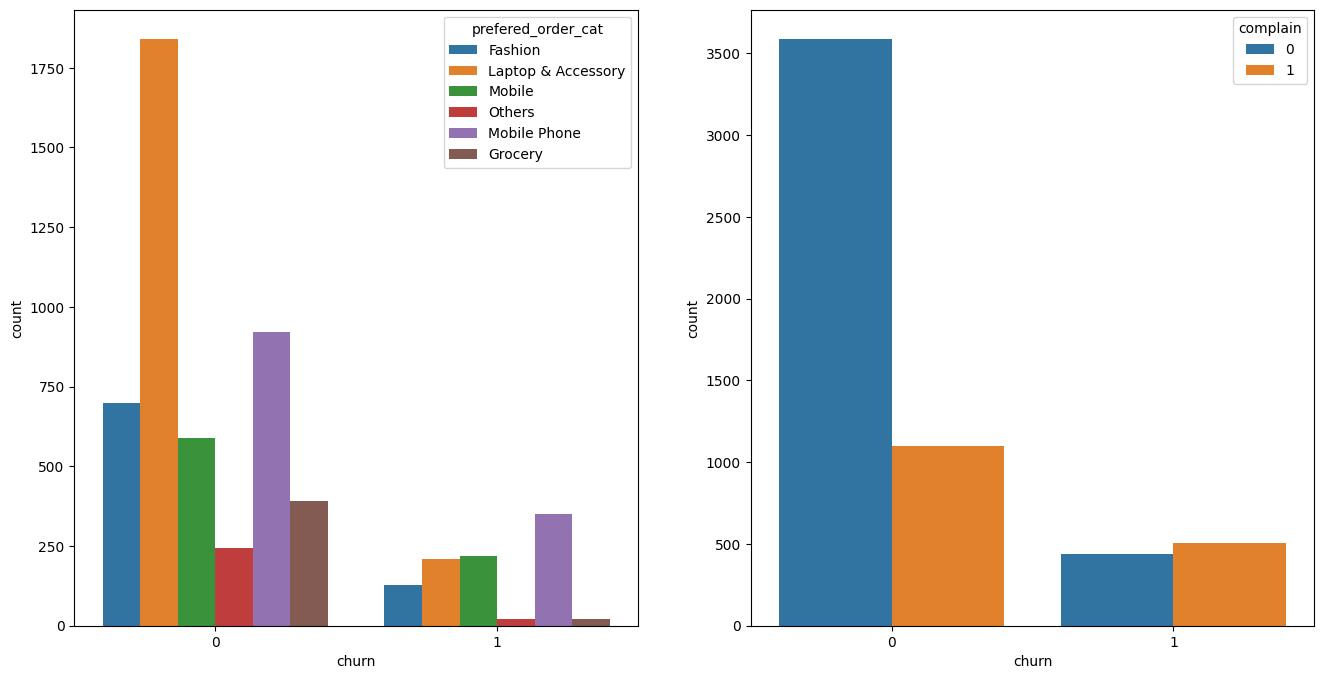

In [4]:
# membuat bar plot pada beberapa variabel kategory
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
sns.countplot(x='churn', hue='prefered_order_cat', data=df, ax=axs[0])
sns.countplot(x='churn', hue='complain', data=df, ax=axs[1])
# sns.countplot(x='churn', hue='tenure', data=df, ax=axs[2])
plt.show()

**Preferred Order Category**

Berdasarkan data dari customer yang *tidak churn*, *Laptop & Accessory* merupakan kategori yang secara signifikan lebih populer dibandingkan yang lainnya (38.4%) diikuti dengan *Mobile Phone*. Sementara itu, *Mobile Phone* juga menjadi kategori yang paling banyak datanya di antara customer yang *churn*. Dapat disimpulkan bahwa product tech merupakan jenis produk yang paling diminati oleh customer yang *churn* maupun *tidak churn*.

**Complain**

Jika melihat dataset customer churn berdasarkan complain, sedikit sekali customer *tidak churn* yang mengajukan *complain* (22.4%). Bertolak belakang dengan customer *churn*, 53.7% customer mengajukan complain yang lebih banyak dari customer yang *tidak complain*. Berdasarkan temuan sebelumnya yang menyatakan bahwa produk tech merupakan jenis produk yang paling populer, dapat disimpulkan bahwa customer yang *churn* memiliki keluhan dalam proses belanja produk tersebut.

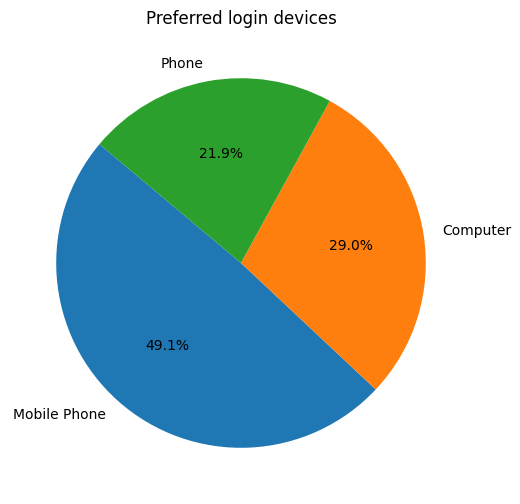

In [5]:
login_device = df['preferred_login_device'].value_counts()

plt.figure(figsize=(30, 6))
plt.pie(login_device, labels=login_device.index, autopct='%1.1f%%', startangle=140)
plt.title('Preferred login devices')
plt.show()

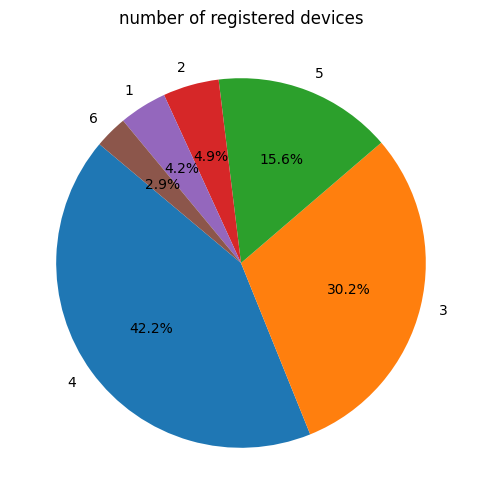

In [6]:
device_registered = df['number_of_device_registered'].value_counts()

plt.figure(figsize=(30, 6))
plt.pie(device_registered, labels=device_registered.index, autopct='%1.1f%%', startangle=140)
plt.title('number of registered devices')
plt.show()

**Preferred login device**

Selain menjadi kategori yang cukup populer untuk dibelanjakan, *Mobile Phone* dan *Computer* (yang juga bisa melalui laptop) juga merupakan login device yang digunakan untuk berbelanja e-commerce, di mana *Mobile Phone* dan *Phone* mewakili sekitar 70% preferred login device dari dataset. Dapat dikorelasikan dengan temuan sebelumnya bahwa customer yang *churn* maupun *tidak churn* menggunakan layanan e-commerce untuk mengganti perangkat-perangkat yang sekarang sedang digunakan.

**Number of Registered Devices**

Untuk melakukan pembelanjaan pada e-commerce, tidak sedikit customer yang meregistrasikan lebih dari 1 perangkat. Dari dataset yang ada, customer paling banyak meregistrasikan 4 (42.2%) dan 3 (30.2%) devices. Mengacu pada pie chart sebelumnya, multiple devices yang diregistrasi dapat berupa memakai lebih dari 1 *Mobile Phone* atau *Computer*. Dengan asumsi bahwa kebanyakan customer sedang mencari pengganti perangkat, registered devices yang lebih banyak dapat mengindikasikan pencarian promosi & diskon yang paling besar.

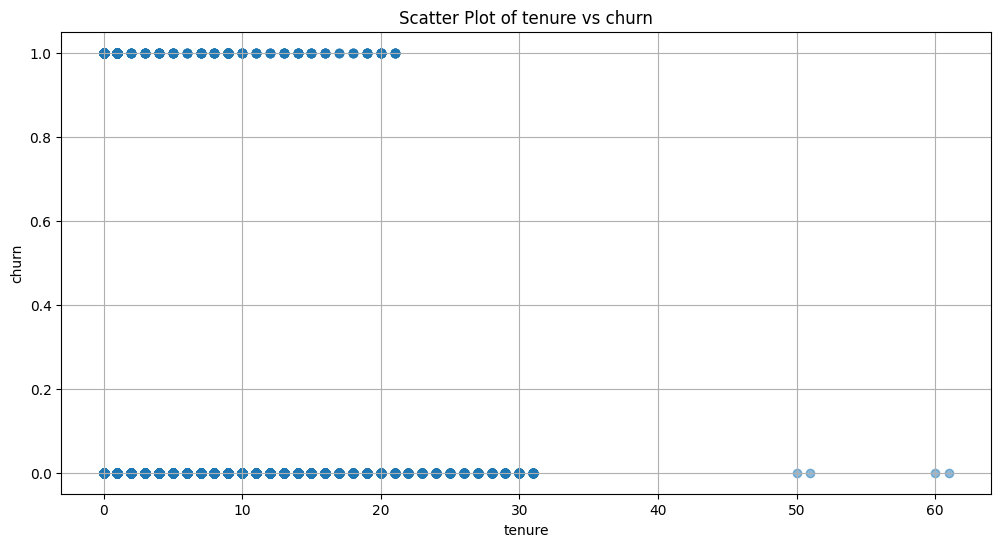

In [7]:
plt.figure(figsize=(12, 6))
plt.scatter(df['tenure'], df['churn'], alpha=0.5)
plt.title('Scatter Plot of tenure vs churn')
plt.xlabel('tenure')
plt.ylabel('churn')
plt.grid(True)
plt.show()

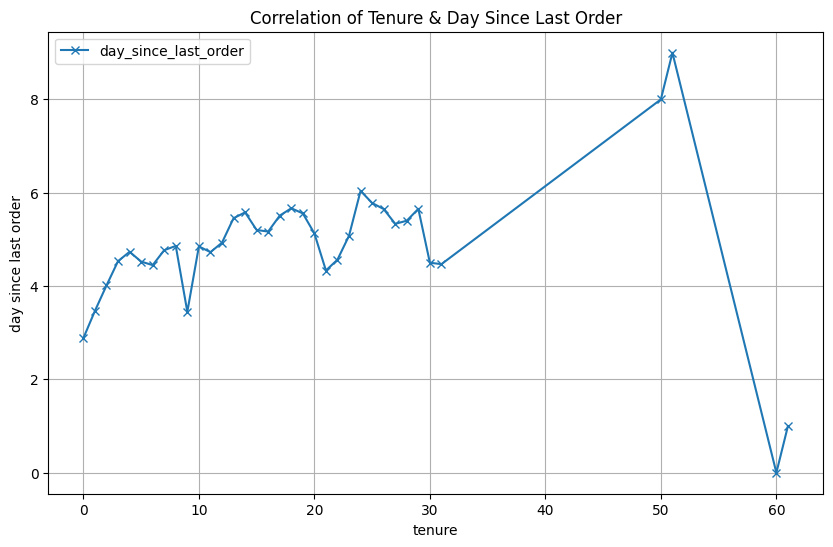

In [8]:
grouped = df.groupby('tenure')[['day_since_last_order']].mean()
grouped.plot(kind='line', marker='x', figsize=(10, 6))

plt.xlabel('tenure')
plt.ylabel('day since last order')
plt.title('Correlation of Tenure & Day Since Last Order')

plt.grid(True)
plt.show()

Mengacu pada tau-correlation, ditemukan bahwa terdapat korelasi negatif antara *tenure* dan *churn*, ini berarti semakin tinggi nilai tenure (jumlah hari yang dihabiskan) pada situs e-commerce, semakin rendah kemungkinan customer untuk *churn*.

**churn & tenure**

Ditemukan bahwa tenure customer yang *tidak churn* memiliki kesamaan dengan customer *churn* sampai dengan nilai 21. Ini menunjukkan bahwa hari ke 21 merupakan penentuan apakah customer akan tetap menggunakan layanan e-commerce yang sama atau beralih ke platform yang lain. Pembeda antara customer yang *churn* dan *tidak churn* adalah kepuasan menggunakan layanan e-commerce dan berhasil atau tidaknya mendapatkan perangkat baru yang dicari.

**tenure & day since last order**

Terdapat korelasi positif antara *tenure* dan *day since last order*. Mengacu pada findings sebelumnya, setelah hari ke 21 semakin tinggi juga nilai *day since last order*. Bagian tersebut mewakili customer yang *tidak churn* dan masih menggunakan aplikasi sehingga masih menempatkan order pada layanan e-commerce.

<Figure size 3000x600 with 0 Axes>

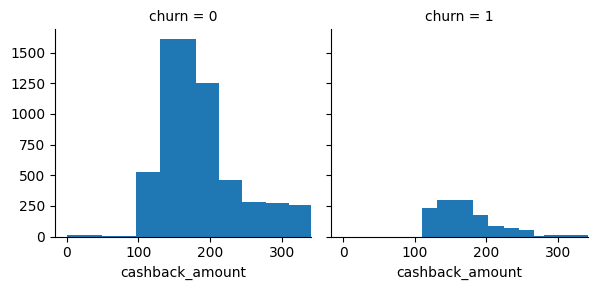

In [9]:
plt.figure(figsize=(30, 6))
grid = sns.FacetGrid(df, col='churn')
grid.map(plt.hist, 'cashback_amount', width=50)
grid.add_legend()

Pada customer yang *tidak churn*, distribusi nominal cashback jauh lebih tinggi dibandingkan customer yang *churn*. Ini menandakan bahwa customer yang *tidak churn* mendapatkan nominal cashback yang besar sehingga merasa puas berbelanja pada layanan e-commerce. Sebaliknya, customer yang *churn* tidak mendapatkan nominal cashback yang cukup yang menyebabkan kegiatan berbeanja tidak sesuai budget dan merasakan ketidakpuasan sehingga akhirnya memutuskan untuk beralih ke layanan lainnya.

<Axes: >

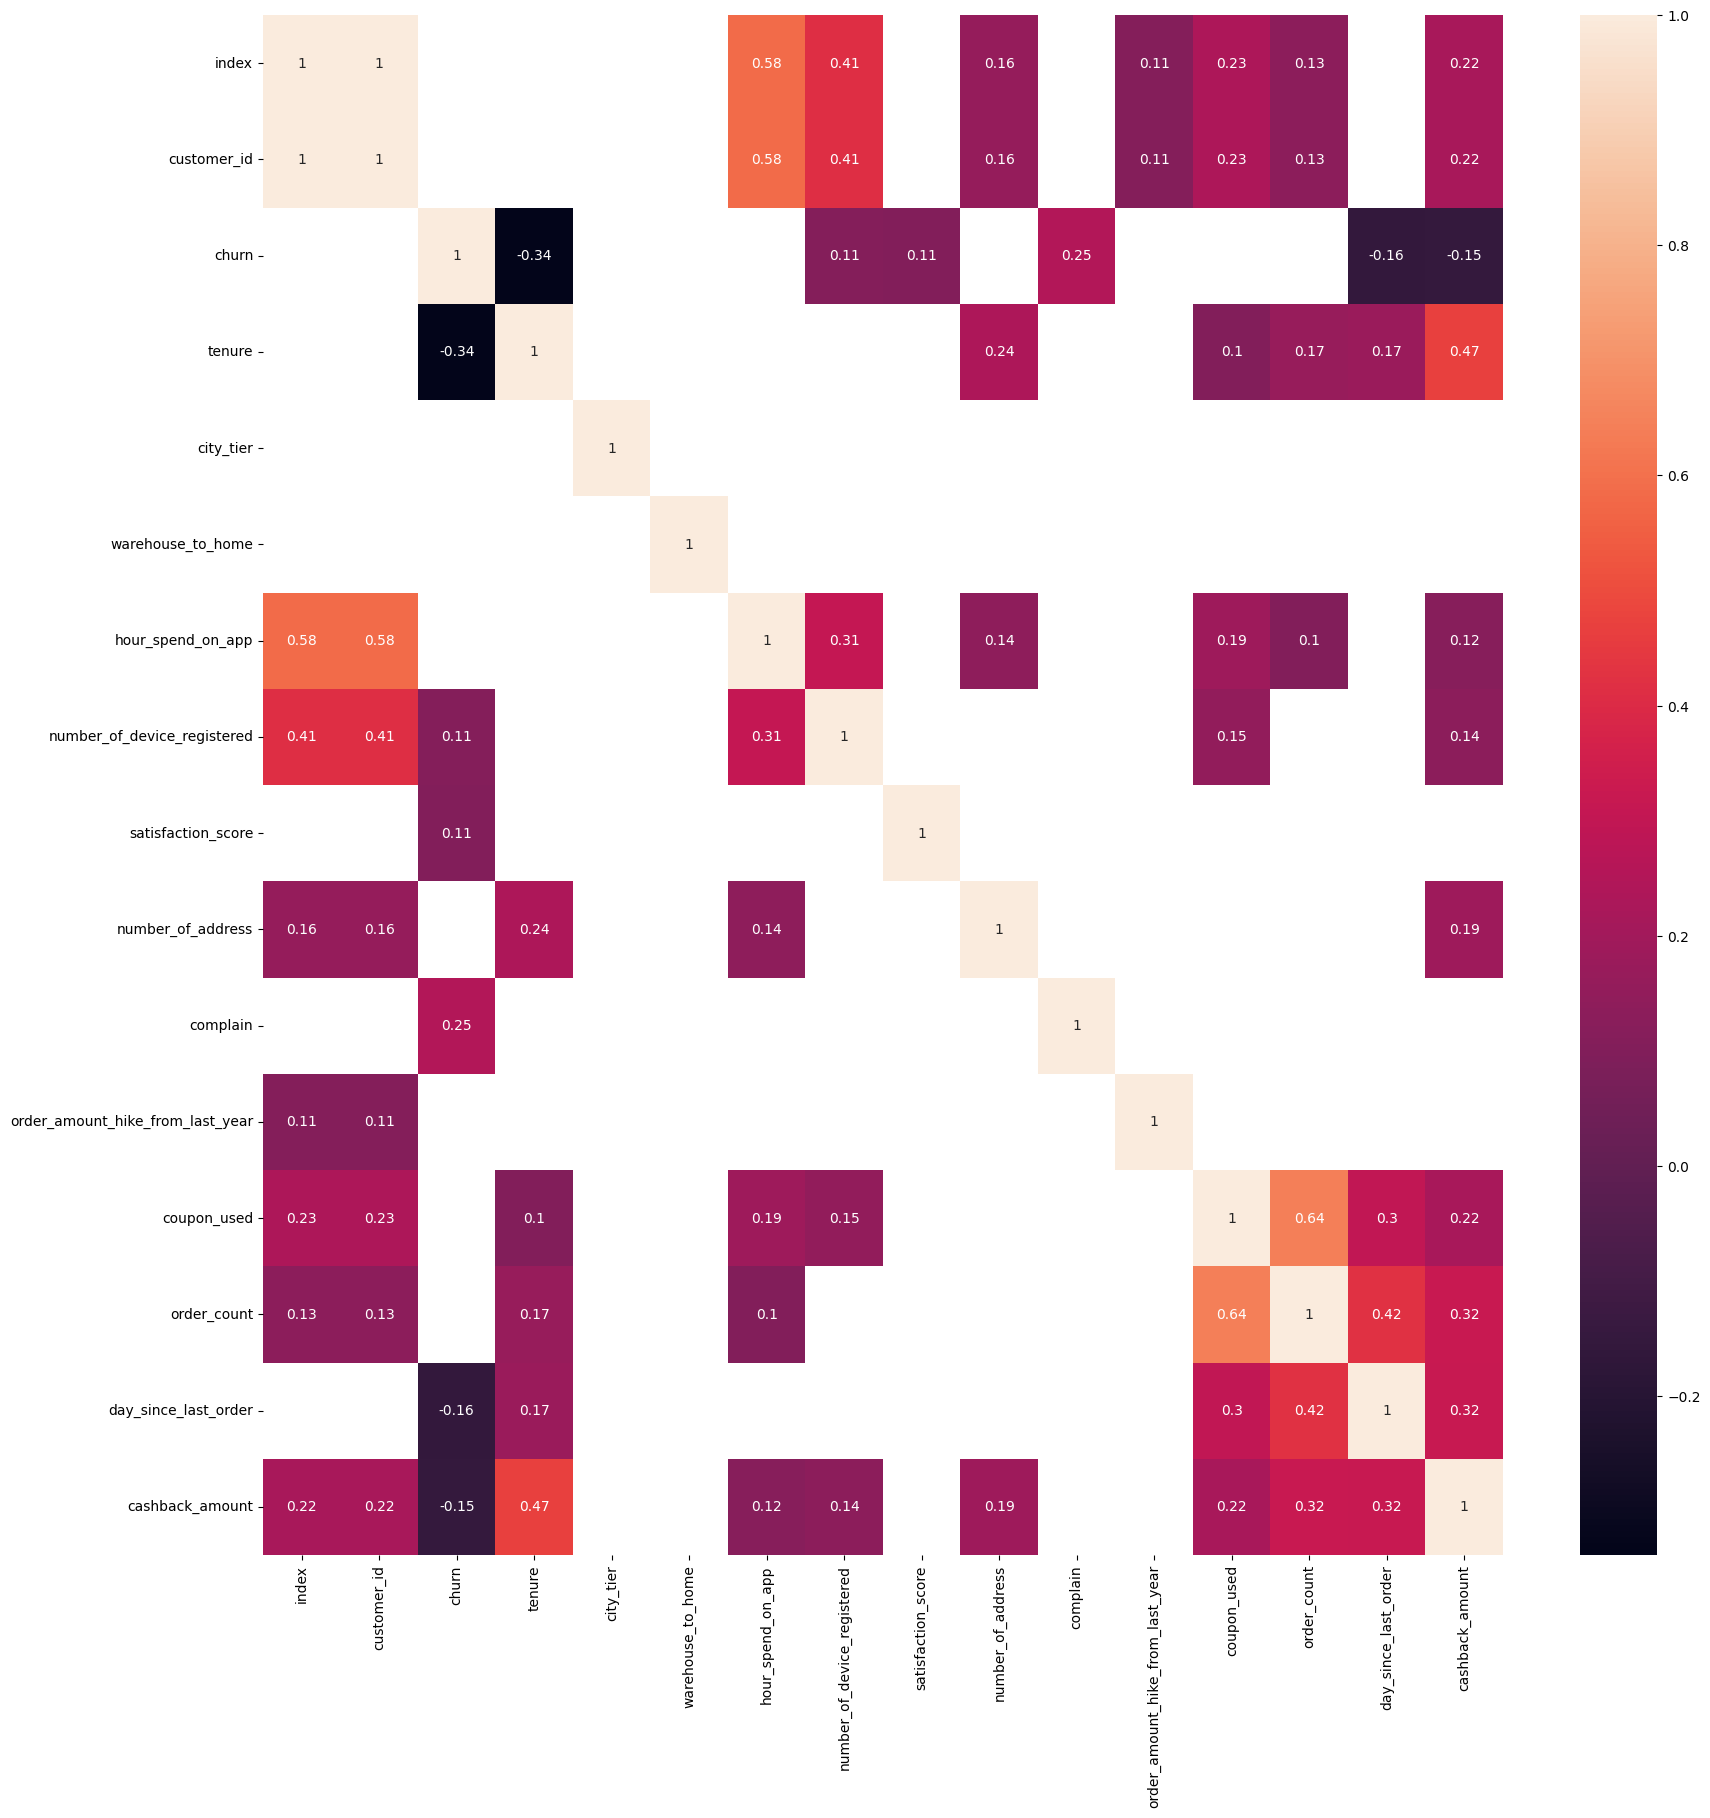

In [7]:
corr_num_cols = df.select_dtypes(include = np.number).corr(method='pearson')

high_correlation = corr_num_cols[(corr_num_cols > 0.1) | (corr_num_cols < -0.1)]

# pembuatan heatmap untuk kelompok temperatur numeric
plt.figure(figsize=(20,20)) 
sns.heatmap(high_correlation,annot=True)

In [8]:
# mencari korelasi tau dan p_value
corr_cat_cols = pd.concat([df.select_dtypes(include = ['object']),df['churn']], axis =1)

for i in corr_cat_cols.columns :
    corr_tau, pval_k = stats.kendalltau(df[i],df['churn'])
    print(f"tau-correlation 'churn' with {i: <24} : {corr_tau: <22}& p-value: {pval_k}")

tau-correlation 'churn' with preferred_login_device   : 0.008985626484120258  & p-value: 0.47744869225055375
tau-correlation 'churn' with preferred_payment_mode   : 0.0012574063112009532 & p-value: 0.9172510672177588
tau-correlation 'churn' with gender                   : 0.0292635653505443    & p-value: 0.02812433858502416
tau-correlation 'churn' with prefered_order_cat       : 0.12451075997099315   & p-value: 3.4445675332889434e-25
tau-correlation 'churn' with marital_status           : 0.1424865118101859    & p-value: 5.08037790405733e-29
tau-correlation 'churn' with churn                    : 1.0                   & p-value: 0.0


In [9]:
# pembuatan data frame baru "datafinal" yang berisikan seleksi dari feature yang diambil
high_correlation = df[['tenure','complain', 'day_since_last_order','cashback_amount',
                       'number_of_device_registered','satisfaction_score']]

In [10]:
# Fungsi untuk menghitung Variance Inflation Factor (VIF)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [11]:
calc_vif(high_correlation)

,variables,VIF
0,tenure,3.195396
1,complain,1.380237
2,day_since_last_order,2.855833
3,cashback_amount,15.083901
4,number_of_device_registered,9.562066
5,satisfaction_score,4.909465


In [12]:
X = df[['tenure','complain', 'day_since_last_order','cashback_amount', 'number_of_device_registered',
        'satisfaction_score','prefered_order_cat','marital_status']]
y = df['churn']

# Membagi data menjadi data latih dan data uji dengan test_size 30% dan random_state 0
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0, stratify=y)

# Menampilkan ukuran data latih dan data uji
print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (3941, 8)
Test size  :  (1689, 8)


In [13]:
# Pilih fitur numerik dan kategorikal pada data latih
X_train_num= X_train[['tenure','cashback_amount']]
X_train_cat= X_train[['day_since_last_order','prefered_order_cat', 'complain', 'number_of_device_registered','satisfaction_score','marital_status' ]]

In [14]:
# Fungsi untuk menampilkan jumlah data unik untuk setiap kolom
def print_unique_categories(X_train_cat, columns):
    for col in columns:
        unique_categories = len(X_train_cat[col].unique())
        print(f'Jumlah data unik {col: <28}: {unique_categories}')

    total_categories = len(X_train_cat)
    print(f'Total dataset {" "*31}: {total_categories}')

# Menampilkan jumlah data unik untuk setiap kolom pada data latih
print_unique_categories(X_train_cat, X_train_cat.columns)

Jumlah data unik day_since_last_order        : 20
Jumlah data unik prefered_order_cat          : 6
Jumlah data unik complain                    : 2
Jumlah data unik number_of_device_registered : 6
Jumlah data unik satisfaction_score          : 5
Jumlah data unik marital_status              : 3
Total dataset                                : 3941


In [15]:
# Menampilkan nilai skewness untuk setiap fitur numerik pada data latih
for i in X_train_num.columns:
    print(i)
    print(X_train_num[i].skew())
    print('-'*30)

tenure
0.8062702683606525
------------------------------
cashback_amount
1.1869533378784483
------------------------------


In [16]:
# Melakukan winsorizing pada fitur numerik
for i in X_train_num:
    wz_numeric = Winsorizer(capping_method='iqr', tail='both', fold=1.5 , variables=[i])
    X_train_num[i] = wz_numeric.fit_transform(X_train_num[[i]])


tenure - Before Capping


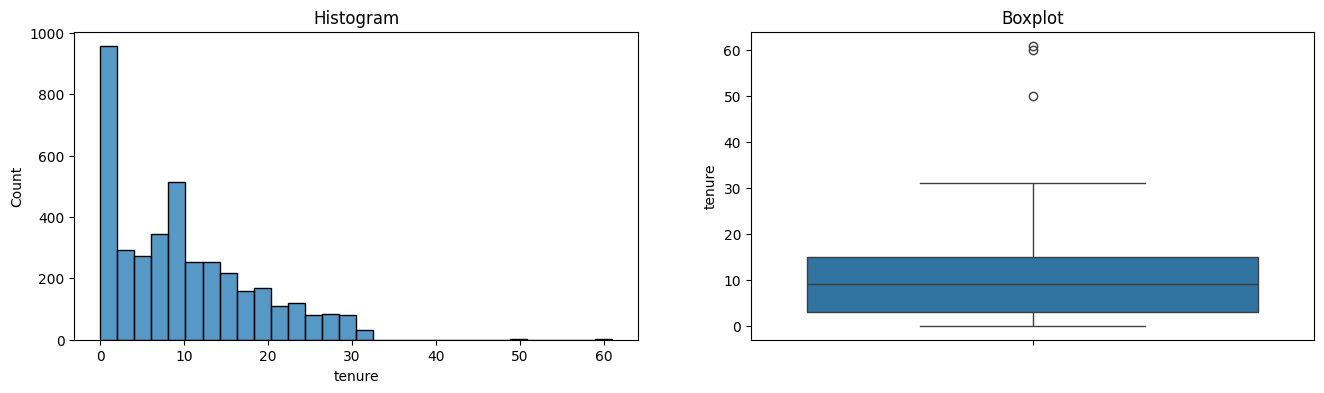

tenure - After Capping


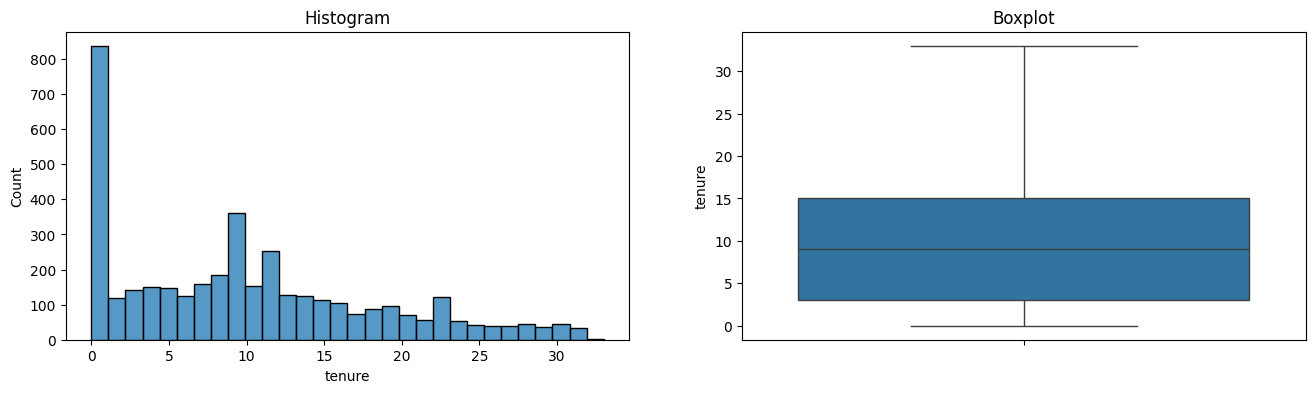

cashback_amount - Before Capping


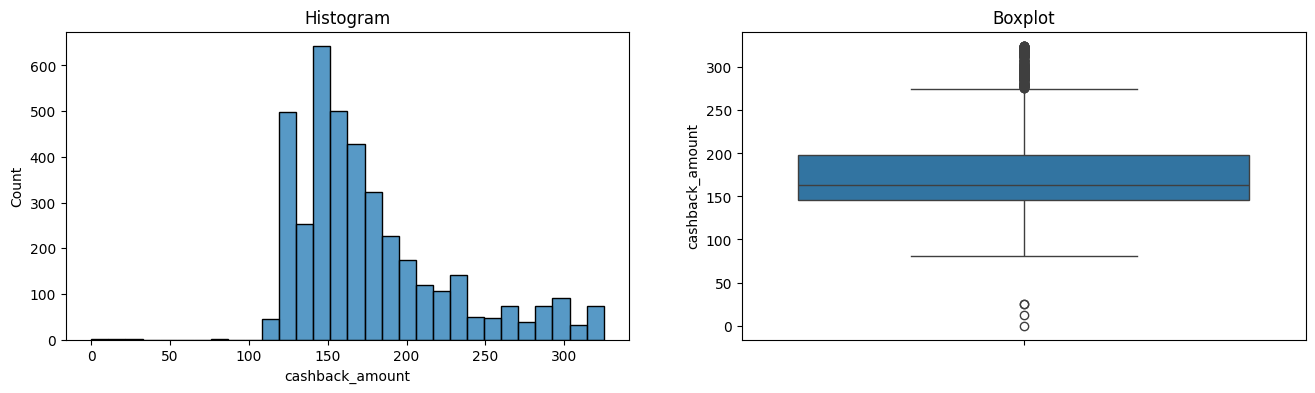

cashback_amount - After Capping


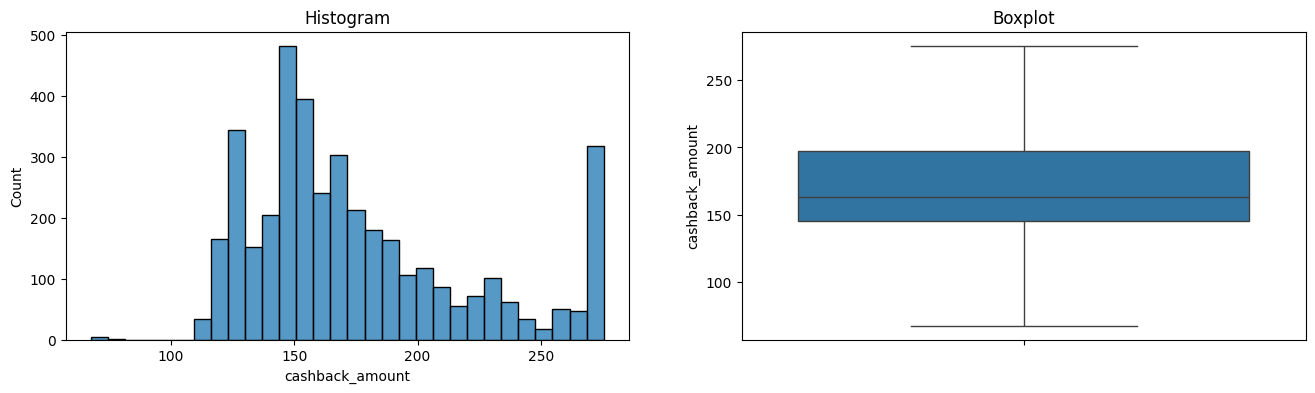

In [17]:
# Fungsi untuk membuat plot histogram dan boxplot sebelum dan sesudah capping
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

# Menampilkan plot sebelum dan sesudah capping untuk fitur
for i in X_train_num:
    print(f'{i} - Before Capping')
    diagnostic_plots(X_train, i)

    print(f'{i} - After Capping')
    diagnostic_plots(X_train_num, i)

In [18]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)

In [19]:
# Mencari persentase value y train 
percentage = y_train.value_counts(normalize=True) * 100

print("Persentase:")
print(percentage)

Persentase:
churn
0    83.151484
1    16.848516
Name: proportion, dtype: float64


In [20]:
list_categoric_num = X_train[['number_of_device_registered','complain', 'day_since_last_order','satisfaction_score']].columns.to_list()
list_numeric = X_train[['tenure','cashback_amount']].columns.to_list()
list_categoric_encoded = X_train[['prefered_order_cat','marital_status']].columns.to_list()

numeric=list_numeric+list_categoric_num

# Mendefinisikan SMOTE dan Tomek Links
smote = SMOTE(sampling_strategy='minority',k_neighbors=5, random_state=42)
tomek = TomekLinks(sampling_strategy='auto')

# Membuat transformer untuk fitur numerik
numeric_transformer = ColumnTransformer(transformers=[
    ('scaling', StandardScaler(),list_numeric),
    ('cat_num', 'passthrough' ,list_categoric_num)  
])

categorical_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), list_categoric_encoded)
    ])

# Menggabungkan transformer untuk semua fitur
preprocessing = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric),
        ('cat', categorical_transformer, list_categoric_encoded)  # Memperlakukan fitur kategorikal sebagai numerik
    ])

In [21]:
pipe_logres = Pipeline([
    ('preprocessing', preprocessing),
    ('smote', smote),
    ('tomek', tomek),
    ('model', LogisticRegression())
])

# Fit Train
pipe_logres.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  ColumnTransformer(transformers=[('scaling',
                                                                                   StandardScaler(),
                                                                                   ['tenure',
                                                                                    'cashback_amount']),
                                                                                  ('cat_num',
                                                                                   'passthrough',
                                                                                   ['number_of_device_registered',
                                                                                    'complain',
                                                                                    'day_since_last_order',
                                                                                    'satisfaction_score'])]),
                                                  ['tenure', 'cashback_amount',
                                                   'number_of_device_registered',
                                                   'complain',
                                                   'day_since_last_order',
                                                   'satisfaction_score']),
                                                 ('cat',
                                                  ColumnTransformer(transformers=[('onehot',
                                                                                   OneHotEncoder(drop='first',
                                                                                                 handle_unknown='ignore'),
                                                                                   ['prefered_order_cat',
                                                                                    'marital_status'])]),
                                                  ['prefered_order_cat',
                                                   'marital_status'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('tomek', TomekLinks()), ('model', LogisticRegression())])

In [22]:
pipe_tree = Pipeline([
    ('preprocessing', preprocessing),
    ('smote', smote),
    ('tomek', tomek),
    ('model', DecisionTreeClassifier())
])

# Fit Train
pipe_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  ColumnTransformer(transformers=[('scaling',
                                                                                   StandardScaler(),
                                                                                   ['tenure',
                                                                                    'cashback_amount']),
                                                                                  ('cat_num',
                                                                                   'passthrough',
                                                                                   ['number_of_device_registered',
                                                                                    'complain',
                                                                                    'day_since_last_order',
                                                                                    'satisfaction_score'])]),
                                                  ['tenure', 'cashback_amount',
                                                   'number_of_device_registered',
                                                   'complain',
                                                   'day_since_last_order',
                                                   'satisfaction_score']),
                                                 ('cat',
                                                  ColumnTransformer(transformers=[('onehot',
                                                                                   OneHotEncoder(drop='first',
                                                                                                 handle_unknown='ignore'),
                                                                                   ['prefered_order_cat',
                                                                                    'marital_status'])]),
                                                  ['prefered_order_cat',
                                                   'marital_status'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('tomek', TomekLinks()), ('model', DecisionTreeClassifier())])

In [23]:
pipe_svm = Pipeline([
    ('preprocessing', preprocessing),
    ('smote', smote),
    ('tomek', tomek),
    ('model', SVC())
])

# Fit Train
pipe_svm.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  ColumnTransformer(transformers=[('scaling',
                                                                                   StandardScaler(),
                                                                                   ['tenure',
                                                                                    'cashback_amount']),
                                                                                  ('cat_num',
                                                                                   'passthrough',
                                                                                   ['number_of_device_registered',
                                                                                    'complain',
                                                                                    'day_since_last_order',
                                                                                    'satisfaction_score'])]),
                                                  ['tenure', 'cashback_amount',
                                                   'number_of_device_registered',
                                                   'complain',
                                                   'day_since_last_order',
                                                   'satisfaction_score']),
                                                 ('cat',
                                                  ColumnTransformer(transformers=[('onehot',
                                                                                   OneHotEncoder(drop='first',
                                                                                                 handle_unknown='ignore'),
                                                                                   ['prefered_order_cat',
                                                                                    'marital_status'])]),
                                                  ['prefered_order_cat',
                                                   'marital_status'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('tomek', TomekLinks()), ('model', SVC())])

In [24]:
pipe_knn = Pipeline([
    ('preprocessing', preprocessing),
    ('smote', smote),
    ('tomek', tomek),
    ('model', KNeighborsClassifier())
])

# Fit Train
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  ColumnTransformer(transformers=[('scaling',
                                                                                   StandardScaler(),
                                                                                   ['tenure',
                                                                                    'cashback_amount']),
                                                                                  ('cat_num',
                                                                                   'passthrough',
                                                                                   ['number_of_device_registered',
                                                                                    'complain',
                                                                                    'day_since_last_order',
                                                                                    'satisfaction_score'])]),
                                                  ['tenure', 'cashback_amount',
                                                   'number_of_device_registered',
                                                   'complain',
                                                   'day_since_last_order',
                                                   'satisfaction_score']),
                                                 ('cat',
                                                  ColumnTransformer(transformers=[('onehot',
                                                                                   OneHotEncoder(drop='first',
                                                                                                 handle_unknown='ignore'),
                                                                                   ['prefered_order_cat',
                                                                                    'marital_status'])]),
                                                  ['prefered_order_cat',
                                                   'marital_status'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('tomek', TomekLinks()), ('model', KNeighborsClassifier())])

In [25]:
pipe_xgb = Pipeline([
    ('preprocessing', preprocessing),
    ('smote', smote),
    ('tomek', tomek),
    ('model', XGBClassifier())
])

# Fit Train
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  ColumnTransformer(transformers=[('scaling',
                                                                                   StandardScaler(),
                                                                                   ['tenure',
                                                                                    'cashback_amount']),
                                                                                  ('cat_num',
                                                                                   'passthrough',
                                                                                   ['number_of_device_registered',
                                                                                    'complain',
                                                                                    'day_since_last_order',
                                                                                    'satisfaction_score'])]),
                                                  ['tenure', 'cashback_amount',
                                                   'number_of_device_registered',
                                                   'complain',
                                                   'day...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [26]:
pipe_forest = Pipeline([
    ('preprocess', preprocessing),
    ('smote', smote),
    ('tomek', tomek),
    ('model', RandomForestClassifier())
])

pipe_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  ColumnTransformer(transformers=[('scaling',
                                                                                   StandardScaler(),
                                                                                   ['tenure',
                                                                                    'cashback_amount']),
                                                                                  ('cat_num',
                                                                                   'passthrough',
                                                                                   ['number_of_device_registered',
                                                                                    'complain',
                                                                                    'day_since_last_order',
                                                                                    'satisfaction_score'])]),
                                                  ['tenure', 'cashback_amount',
                                                   'number_of_device_registered',
                                                   'complain',
                                                   'day_since_last_order',
                                                   'satisfaction_score']),
                                                 ('cat',
                                                  ColumnTransformer(transformers=[('onehot',
                                                                                   OneHotEncoder(drop='first',
                                                                                                 handle_unknown='ignore'),
                                                                                   ['prefered_order_cat',
                                                                                    'marital_status'])]),
                                                  ['prefered_order_cat',
                                                   'marital_status'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('tomek', TomekLinks()), ('model', RandomForestClassifier())])

In [27]:
# set skfold
skfold=StratifiedKFold(n_splits=5)
# checking cross validation score
cv_logres_model = cross_val_score(pipe_logres, X_train, y_train, cv=skfold, scoring="recall")
cv_tree_model = cross_val_score(pipe_tree, X_train, y_train, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(pipe_svm, X_train, y_train, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(pipe_knn, X_train, y_train, cv=skfold, scoring="recall")
cv_xgb_model = cross_val_score(pipe_xgb, X_train, y_train, cv=skfold, scoring="recall")
cv_forest_model = cross_val_score(pipe_forest, X_train, y_train, cv=skfold, scoring="recall")

name_model = []
cv_scores=0
for cv,name in zip([cv_logres_model, cv_tree_model, cv_svm_model, cv_knn_model, cv_xgb_model, cv_forest_model],['logres_model', 'tree_model', 'svm_model', 'knn_model', 'xgb_model', 'forest_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

logres_model
recall - All - Cross Validation  :  [0.78195489 0.78030303 0.80451128 0.79699248 0.73684211]
recall - Mean - Cross Validation :  0.7801207564365459
recall - Std - Cross Validation  :  0.023477612975524344
recall - Range of Test-Set       :  0.7566431434610216 - 0.8035983694120702
--------------------------------------------------
tree_model
recall - All - Cross Validation  :  [0.63909774 0.81818182 0.7443609  0.7518797  0.71428571]
recall - Mean - Cross Validation :  0.7335611756664389
recall - Std - Cross Validation  :  0.05815107704210708
recall - Range of Test-Set       :  0.6754100986243318 - 0.791712252708546
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.77443609 0.78030303 0.80451128 0.80451128 0.77443609]
recall - Mean - Cross Validation :  0.7876395534290271
recall - Std - Cross Validation  :  0.013941288648465522
recall - Range of Test-Set       :  0.7736982647805616 - 0.8015808420774927
-----------------------

In [28]:
# Mendefinisikan parameter grid untuk GridSearchCV
params = [
    {'preprocessing__num' : [MinMaxScaler(), StandardScaler(), RobustScaler()], 
     'model':[DecisionTreeClassifier()],
     'model__criterion': ['gini', 'entropy'],
     'model__max_depth': [10, 20, 30],
     'model__min_samples_split': [2, 5, 10],
     'model__min_samples_leaf': [1, 2, 4]},
    
]


# Membuat objek GridSearchCV
grid_tree = GridSearchCV(pipe_svm, params, cv=3, verbose=3, scoring='recall', error_score='raise')

# Melakukan grid search untuk pemilihan model terbaik
grid_tree.fit(X_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV 1/3] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, preprocessing__num=MinMaxScaler();, score=0.665 total time=   0.0s
[CV 2/3] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, preprocessing__num=MinMaxScaler();, score=0.748 total time=   0.0s
[CV 3/3] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, preprocessing__num=MinMaxScaler();, score=0.674 total time=   0.0s
[CV 1/3] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, preprocessing__num=StandardScaler();, score=0.719 total time=   0.0s
[CV 2/3] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, mo

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         ColumnTransformer(transformers=[('scaling',
                                                                                                          StandardScaler(),
                                                                                                          ['tenure',
                                                                                                           'cashback_amount']),
                                                                                                         ('cat_num',
                                                                                                          'passthrough',
                                                                                                          ['number_of_device_registered',
                                                                                                           'complain',
                                                                                                           'day_since_last_order',
                                                                                                           'satisfaction_score'])]),
                                                                         ['tenure',
                                                                          'cashback_amoun...
                                              sampling_strategy='minority')),
                                       ('tomek', TomekLinks()),
                                       ('model', SVC())]),
             param_grid=[{'model': [DecisionTreeClassifier()],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [10, 20, 30],
                          'model__min_samples_leaf': [1, 2, 4],
                          'model__min_samples_split': [2, 5, 10],
                          'preprocessing__num': [MinMaxScaler(),
                                                 StandardScaler(),
                                                 RobustScaler()]}],
             scoring='recall', verbose=3)

In [29]:
if grid_tree.best_score_>cv_scores:
    print(f'Score Hypertuning : {grid_tree.best_score_}')
    print(f'Score Baseline : {cv_scores}')
    print('Model dengan score terbaik : Hypertuning')
else:
    print(f'Score Hypertuning : {grid_tree.best_score_}')
    print(f'Score Baseline : {cv_scores}')
    print('Model dengan score terbaik : Baseline')

Score Hypertuning : 0.7364898835487071
Score Baseline : 0.7876395534290271
Model dengan score terbaik : Baseline


In [67]:
feature_names = numeric + list(preprocessing.named_transformers_['cat'].named_transformers_['onehot'].get_feature_names_out(list_categoric_encoded)) 
feature_importances= grid_tree.best_estimator_.named_steps['model'].feature_importances_.tolist()
params = {
    'feature name': feature_names,
    'Feature Importance': feature_importances
}

# print('Intercept : ', intercept)
coef = pd.DataFrame(params)
coef.sort_values(by="Feature Importance")

,feature name,Feature Importance
8,prefered_order_cat_Mobile,0.002246
6,prefered_order_cat_Grocery,0.003562
10,prefered_order_cat_Others,0.009925
9,prefered_order_cat_Mobile Phone,0.014482
11,marital_status_Married,0.018385
7,prefered_order_cat_Laptop & Accessory,0.022154
12,marital_status_Single,0.026428
3,complain,0.065546
2,number_of_device_registered,0.091056
4,day_since_last_order,0.100729


Text(0.5, 0, 'Feature Importance')

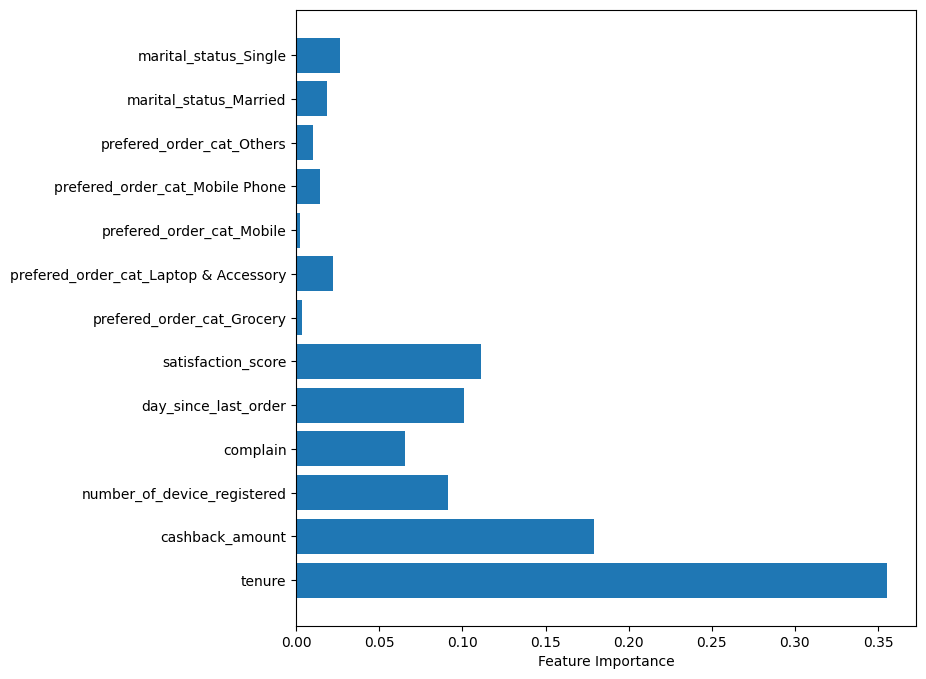

In [31]:
plt.figure(figsize=(8,8))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")

========================= TRAINING =========================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3277
           1       1.00      0.99      1.00       664

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



========================= TEST =========================
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1405
           1       0.75      0.78      0.77       284

    accuracy                           0.92      1689
   macro avg       0.85      0.86      0.86      1689
weighted avg       0.92      0.92      0.92      1689



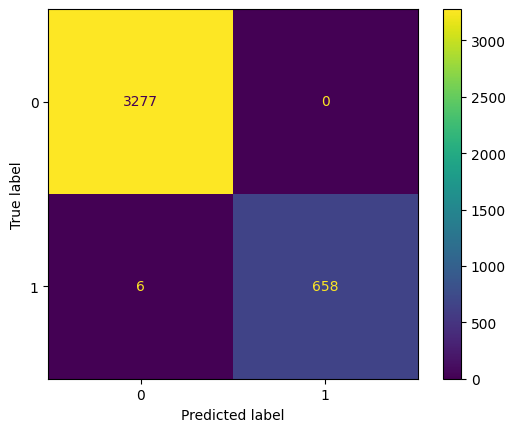

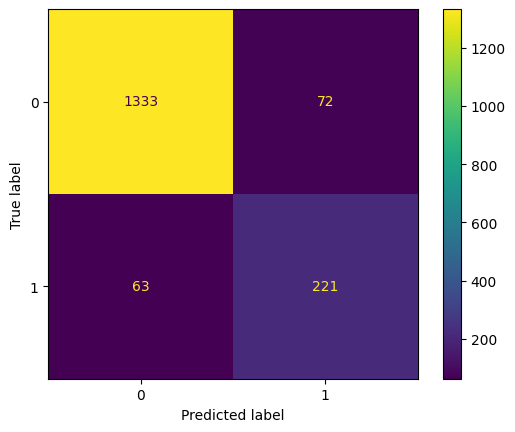

In [32]:
# Memprediksi nilai target pada data latih dan uji menggunakan model terbaik
y_train_pred = grid_tree.predict(X_train)
y_test_pred = grid_tree.predict(X_test)

# Menampilkan laporan klasifikasi untuk data latih
print("="*25,"TRAINING","="*25)
print(classification_report(y_train,y_train_pred))
print("\n")

# Menampilkan laporan klasifikasi untuk data uji
print("="*25,"TEST","="*25)
print(classification_report(y_test,y_test_pred))

# Confusion Matrix - train Set
cm_train = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(cm_train).plot()

# Confusion Matrix - test Set
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm_test).plot()

In [33]:
# Membuat variable baru
X_test_1 = X_test.copy()

X_test_1['Rot'] = y_test
X_test_1['Prediction'] = y_test_pred

In [34]:
False_negatif = X_test_1[(X_test_1['Rot'] == 1 ) &(X_test_1['Prediction'] == 0)]
False_negatif

,tenure,complain,day_since_last_order,cashback_amount,number_of_device_registered,satisfaction_score,prefered_order_cat,marital_status,Rot,Prediction
4688,14.0,1,4.0,192.96,4,3,Laptop & Accessory,Married,1,0
2134,7.0,0,6.0,204.82,4,5,Fashion,Married,1,0
466,0.0,0,2.0,153.24,3,5,Laptop & Accessory,Single,1,0
24,14.0,0,3.0,206.50,5,2,Fashion,Single,1,0
3442,1.0,0,15.0,152.43,2,5,Mobile Phone,Single,1,0
...,...,...,...,...,...,...,...,...,...,...
1471,20.0,0,6.0,203.12,3,1,Fashion,Married,1,0
1434,9.0,0,7.0,196.19,4,1,Fashion,Single,1,0
3252,1.0,1,9.0,151.86,4,2,Mobile Phone,Single,1,0
2815,5.0,1,6.0,184.93,4,2,Laptop & Accessory,Single,1,0


In [35]:
False_negatif.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,63.0,5.920635,6.376119,0.00,1.000,3.00,9.000,21.00
complain,63.0,0.444444,0.500895,0.00,0.000,0.00,1.000,1.00
day_since_last_order,63.0,4.650794,3.793708,0.00,2.000,4.00,6.500,15.00
cashback_amount,63.0,177.416508,42.036066,120.86,151.235,161.91,198.865,323.59
number_of_device_registered,63.0,3.952381,1.022782,2.00,3.000,4.00,4.000,6.00
satisfaction_score,63.0,3.238095,1.531542,1.00,2.000,3.00,5.000,5.00
Rot,63.0,1.000000,0.000000,1.00,1.000,1.00,1.000,1.00
Prediction,63.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00


In [36]:
# Hitung rata-rata dari kolom-kolom numerik pada dataframe True_negative
true_negatif = X_test_1[(X_test_1['Rot'] == 0 ) &(X_test_1['Prediction'] == 0)]
true_negatif.head()

,tenure,complain,day_since_last_order,cashback_amount,number_of_device_registered,satisfaction_score,prefered_order_cat,marital_status,Rot,Prediction
1812,10.0,0,7.0,188.34,3,4,Fashion,Married,0,0
4622,8.0,0,8.0,178.37,2,1,Laptop & Accessory,Single,0,0
2688,9.0,0,2.0,120.62,3,5,Mobile,Single,0,0
4418,25.0,0,1.0,152.23,4,1,Mobile Phone,Married,0,0
3559,20.0,0,4.0,315.81,4,4,Others,Divorced,0,0


In [37]:
true_negatif.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,1333.0,12.081770,8.345401,0.0,6.00,10.00,18.00,51.00
complain,1333.0,0.226557,0.418760,0.0,0.00,0.00,0.00,1.00
day_since_last_order,1333.0,4.752438,3.582815,0.0,2.00,3.00,8.00,30.00
cashback_amount,1333.0,181.014291,50.718344,0.0,147.74,166.93,201.25,324.73
number_of_device_registered,1333.0,3.633908,0.985384,1.0,3.00,4.00,4.00,6.00
satisfaction_score,1333.0,3.018005,1.388922,1.0,2.00,3.00,4.00,5.00
Rot,1333.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
Prediction,1333.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00


In [38]:
# Menghitung rata - rata
X_test2 = X_test_1.drop('Rot',axis=1)
X_test2.groupby('Prediction').describe().T

Prediction                                   0           1
tenure                      count  1396.000000  293.000000
                            mean     11.803725    3.761092
                            std       8.363268    5.454443
                            min       0.000000    0.000000
                            25%       5.000000    0.000000
                            50%      10.000000    1.000000
                            75%      17.000000    6.000000
                            max      51.000000   21.000000
complain                    count  1396.000000  293.000000
                            mean      0.236390    0.532423
                            std       0.425016    0.499801
                            min       0.000000    0.000000
                            25%       0.000000    0.000000
                            50%       0.000000    1.000000
                            75%       0.000000    1.000000
                            max       1.000000    1.000000
day_since_last_order        count  1396.000000  293.000000
                            mean      4.747851    3.184300
                            std       3.591232    3.729762
                            min       0.000000    0.000000
                            25%       2.000000    1.000000
                            50%       3.000000    2.000000
                            75%       8.000000    4.000000
                            max      30.000000   46.000000
cashback_amount             count  1396.000000  293.000000
                            mean    180.851927  157.912218
                            std      50.351491   36.366481
                            min       0.000000   56.000000
                            25%     147.790000  133.480000
                            50%     166.900000  149.320000
                            75%     201.292500  173.360000
                            max     324.730000  323.450000
number_of_device_registered count  1396.000000  293.000000
                            mean      3.648281    3.918089
                            std       0.988937    1.017037
                            min       1.000000    1.000000
                            25%       3.000000    3.000000
                            50%       4.000000    4.000000
                            75%       4.000000    5.000000
                            max       6.000000    6.000000
satisfaction_score          count  1396.000000  293.000000
                            mean      3.027937    3.269625
                            std       1.395823    1.389417
                            min       1.000000    1.000000
                            25%       2.000000    2.000000
                            50%       3.000000    3.000000
                            75%       4.000000    5.000000
                            max       5.000000    5.000000

In [39]:
# Menghitung rata - rata
X_test3 = X_test_1.drop('Prediction',axis=1)
X_test3.groupby('Rot').describe().T

Rot                                          0           1
tenure                      count  1405.000000  284.000000
                            mean     11.758007    3.732394
                            std       8.377053    5.376845
                            min       0.000000    0.000000
                            25%       5.000000    0.000000
                            50%      10.000000    1.000000
                            75%      17.000000    6.000000
                            max      51.000000   21.000000
complain                    count  1405.000000  284.000000
                            mean      0.236299    0.542254
                            std       0.424959    0.499091
                            min       0.000000    0.000000
                            25%       0.000000    0.000000
                            50%       0.000000    1.000000
                            75%       0.000000    1.000000
                            max       1.000000    1.000000
day_since_last_order        count  1405.000000  284.000000
                            mean      4.655516    3.591549
                            std       3.544514    4.091973
                            min       0.000000    0.000000
                            25%       2.000000    1.000000
                            50%       3.000000    3.000000
                            75%       7.000000    6.000000
                            max      30.000000   46.000000
cashback_amount             count  1405.000000  284.000000
                            mean    180.099794  160.906197
                            std      50.487729   36.858846
                            min       0.000000  110.090000
                            25%     147.650000  135.630000
                            50%     166.080000  150.535000
                            75%     199.800000  178.695000
                            max     324.730000  323.590000
number_of_device_registered count  1405.000000  284.000000
                            mean      3.640569    3.964789
                            std       0.982572    1.035838
                            min       1.000000    1.000000
                            25%       3.000000    3.000000
                            50%       4.000000    4.000000
                            75%       4.000000    5.000000
                            max       6.000000    6.000000
satisfaction_score          count  1405.000000  284.000000
                            mean      3.017082    3.330986
                            std       1.393307    1.390131
                            min       1.000000    1.000000
                            25%       2.000000    2.000000
                            50%       3.000000    3.000000
                            75%       4.000000    5.000000
                            max       5.000000    5.000000

In [40]:
# Mendefinisikan parameter grid untuk GridSearchCV
params = [

    {'preprocessing__num':[MinMaxScaler(),StandardScaler(),RobustScaler()],
     'model':[LogisticRegression(solver='liblinear')],
     'model__penalty': ['l1', 'l2'],
     'model__C': [0.1, 1.0, 10.0],
     'model__fit_intercept': [True, False],  
     'model__class_weight': [None, 'balanced']}, 
    
]


# Membuat objek GridSearchCV
grid_logreg = GridSearchCV(pipe_svm, params, cv=3, verbose=3, scoring='recall', error_score='raise')

# Melakukan grid search untuk pemilihan model terbaik
grid_logreg.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END model=LogisticRegression(solver='liblinear'), model__C=0.1, model__class_weight=None, model__fit_intercept=True, model__penalty=l1, preprocessing__num=MinMaxScaler();, score=0.814 total time=   0.0s
[CV 2/3] END model=LogisticRegression(solver='liblinear'), model__C=0.1, model__class_weight=None, model__fit_intercept=True, model__penalty=l1, preprocessing__num=MinMaxScaler();, score=0.793 total time=   0.0s
[CV 3/3] END model=LogisticRegression(solver='liblinear'), model__C=0.1, model__class_weight=None, model__fit_intercept=True, model__penalty=l1, preprocessing__num=MinMaxScaler();, score=0.747 total time=   0.0s
[CV 1/3] END model=LogisticRegression(solver='liblinear'), model__C=0.1, model__class_weight=None, model__fit_intercept=True, model__penalty=l1, preprocessing__num=StandardScaler();, score=0.810 total time=   0.0s
[CV 2/3] END model=LogisticRegression(solver='liblinear'), model__C=0.1, model__class_we

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         ColumnTransformer(transformers=[('scaling',
                                                                                                          StandardScaler(),
                                                                                                          ['tenure',
                                                                                                           'cashback_amount']),
                                                                                                         ('cat_num',
                                                                                                          'passthrough',
                                                                                                          ['number_of_device_registered',
                                                                                                           'complain',
                                                                                                           'day_since_last_order',
                                                                                                           'satisfaction_score'])]),
                                                                         ['tenure',
                                                                          'cashback_amoun...
                                              sampling_strategy='minority')),
                                       ('tomek', TomekLinks()),
                                       ('model', SVC())]),
             param_grid=[{'model': [LogisticRegression(solver='liblinear')],
                          'model__C': [0.1, 1.0, 10.0],
                          'model__class_weight': [None, 'balanced'],
                          'model__fit_intercept': [True, False],
                          'model__penalty': ['l1', 'l2'],
                          'preprocessing__num': [MinMaxScaler(),
                                                 StandardScaler(),
                                                 RobustScaler()]}],
             scoring='recall', verbose=3)

In [41]:
if grid_logreg.best_score_>cv_scores:
    print(f'Score Hypertuning : {grid_logreg.best_score_}')
    print(f'Score Baseline : {cv_scores}')
    print('Model dengan score terbaik : Hypertuning')
else:
    print(f'Score Hypertuning : {grid_logreg.best_score_}')
    print(f'Score Baseline : {cv_scores}')
    print('Model dengan score terbaik : Baseline')

Score Hypertuning : 0.787649640590817
Score Baseline : 0.7876395534290271
Model dengan score terbaik : Hypertuning


========================= TRAINING =========================
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      3277
           1       0.43      0.81      0.57       664

    accuracy                           0.79      3941
   macro avg       0.69      0.80      0.71      3941
weighted avg       0.87      0.79      0.81      3941



========================= TEST =========================
              precision    recall  f1-score   support

           0       0.95      0.78      0.85      1405
           1       0.42      0.78      0.54       284

    accuracy                           0.78      1689
   macro avg       0.68      0.78      0.70      1689
weighted avg       0.86      0.78      0.80      1689



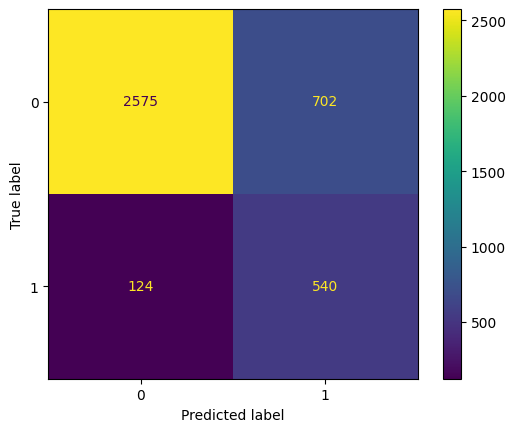

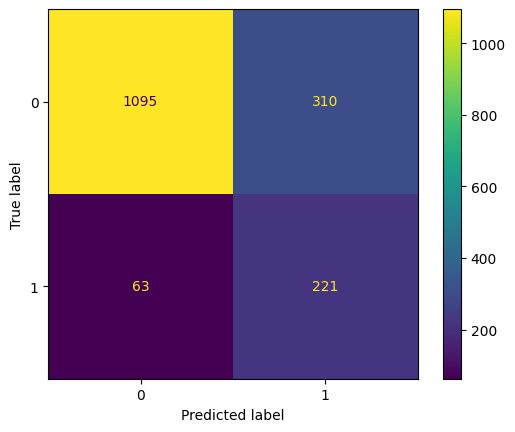

In [124]:
# Memprediksi nilai target pada data latih dan uji menggunakan model terbaik
y_train_pred = grid_logreg.predict(X_train)
y_test_pred = grid_logreg.predict(X_test)

# Menampilkan laporan klasifikasi untuk data latih
print("="*25,"TRAINING","="*25)
print(classification_report(y_train,y_train_pred))
print("\n")

# Menampilkan laporan klasifikasi untuk data uji
print("="*25,"TEST","="*25)
print(classification_report(y_test,y_test_pred))

# Confusion Matrix - train Set
cm_train = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(cm_train).plot()

# Confusion Matrix - test Set
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm_test).plot()

In [125]:
# Membuat variable baru
X_test_1 = X_test.copy()

X_test_1['Rot'] = y_test
X_test_1['Prediction'] = y_test_pred

In [86]:
False_negatif = X_test_1[(X_test_1['Rot'] == 1 ) &(X_test_1['Prediction'] == 0)]
False_negatif

,tenure,complain,day_since_last_order,cashback_amount,number_of_device_registered,satisfaction_score,prefered_order_cat,marital_status,Rot,Prediction
4688,14.0,1,4.0,192.96,4,3,Laptop & Accessory,Married,1,0
2134,7.0,0,6.0,204.82,4,5,Fashion,Married,1,0
3491,14.0,1,1.0,172.28,4,3,Laptop & Accessory,Single,1,0
4726,11.0,1,4.0,188.97,2,3,Laptop & Accessory,Single,1,0
24,14.0,0,3.0,206.50,5,2,Fashion,Single,1,0
...,...,...,...,...,...,...,...,...,...,...
5604,20.0,0,9.0,148.39,4,3,Mobile Phone,Married,1,0
5088,8.0,0,6.0,204.78,4,1,Fashion,Married,1,0
1471,20.0,0,6.0,203.12,3,1,Fashion,Married,1,0
1434,9.0,0,7.0,196.19,4,1,Fashion,Single,1,0


In [126]:
False_negatif.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,51.0,8.588235,6.512070,0.00,1.00,9.00,13.50,21.00
complain,51.0,0.156863,0.367290,0.00,0.00,0.00,0.00,1.00
day_since_last_order,51.0,4.823529,6.743014,0.00,1.00,3.00,7.00,46.00
cashback_amount,51.0,174.032941,52.078511,113.59,138.49,167.96,196.19,323.59
number_of_device_registered,51.0,3.725490,0.896179,1.00,3.00,4.00,4.00,6.00
satisfaction_score,51.0,3.333333,1.336663,1.00,2.50,3.00,5.00,5.00
Rot,51.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
Prediction,51.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00


In [127]:
# Hitung rata-rata dari kolom-kolom numerik pada dataframe True_negative
true_negatif = X_test_1[(X_test_1['Rot'] == 0 ) &(X_test_1['Prediction'] == 0)]
true_negatif.head()

,tenure,complain,day_since_last_order,cashback_amount,number_of_device_registered,satisfaction_score,prefered_order_cat,marital_status,Rot,Prediction
1812,10.0,0,7.0,188.34,3,4,Fashion,Married,0,0
4622,8.0,0,8.0,178.37,2,1,Laptop & Accessory,Single,0,0
4418,25.0,0,1.0,152.23,4,1,Mobile Phone,Married,0,0
3559,20.0,0,4.0,315.81,4,4,Others,Divorced,0,0
681,25.0,0,0.0,204.45,3,4,Fashion,Single,0,0


In [128]:
true_negatif.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,1095.0,13.874886,8.039656,0.0,8.000,12.00,19.000,51.00
complain,1095.0,0.178082,0.382757,0.0,0.000,0.00,0.000,1.00
day_since_last_order,1095.0,5.100457,3.706182,0.0,2.000,4.00,8.000,30.00
cashback_amount,1095.0,186.536320,52.382554,0.0,150.925,170.53,208.655,324.73
number_of_device_registered,1095.0,3.572603,0.994490,1.0,3.000,4.00,4.000,6.00
satisfaction_score,1095.0,2.915068,1.393082,1.0,2.000,3.00,4.000,5.00
Rot,1095.0,0.000000,0.000000,0.0,0.000,0.00,0.000,0.00
Prediction,1095.0,0.000000,0.000000,0.0,0.000,0.00,0.000,0.00


In [129]:
# Menghitung rata - rata
X_test2 = X_test_1.drop('Rot',axis=1)
X_test2.groupby('Prediction').describe().T

Prediction                                   0           1
tenure                      count  1158.000000  531.000000
                            mean     13.668394    3.299435
                            std       8.018166    3.980469
                            min       0.000000    0.000000
                            25%       8.000000    1.000000
                            50%      12.000000    1.000000
                            75%      19.000000    5.000000
                            max      51.000000   18.000000
complain                    count  1158.000000  531.000000
                            mean      0.183074    0.516008
                            std       0.386894    0.500215
                            min       0.000000    0.000000
                            25%       0.000000    0.000000
                            50%       0.000000    1.000000
                            75%       0.000000    1.000000
                            max       1.000000    1.000000
day_since_last_order        count  1158.000000  531.000000
                            mean      5.125216    3.062147
                            std       3.887000    2.611639
                            min       0.000000    0.000000
                            25%       2.000000    1.000000
                            50%       4.000000    3.000000
                            75%       8.000000    4.000000
                            max      46.000000   15.000000
cashback_amount             count  1158.000000  531.000000
                            mean    186.451528  155.982486
                            std      52.140113   32.705929
                            min       0.000000    0.000000
                            25%     150.767500  134.820000
                            50%     170.925000  149.390000
                            75%     208.510000  170.910000
                            max     324.730000  308.030000
number_of_device_registered count  1158.000000  531.000000
                            mean      3.572539    3.962335
                            std       0.995846    0.952897
                            min       1.000000    1.000000
                            25%       3.000000    3.000000
                            50%       4.000000    4.000000
                            75%       4.000000    5.000000
                            max       6.000000    6.000000
satisfaction_score          count  1158.000000  531.000000
                            mean      2.921416    3.393597
                            std       1.391991    1.354753
                            min       1.000000    1.000000
                            25%       2.000000    3.000000
                            50%       3.000000    3.000000
                            75%       4.000000    5.000000
                            max       5.000000    5.000000

In [130]:
# Menghitung rata - rata
X_test3 = X_test_1.drop('Prediction',axis=1)
X_test3.groupby('Rot').describe().T

Rot                                          0           1
tenure                      count  1405.000000  284.000000
                            mean     11.758007    3.732394
                            std       8.377053    5.376845
                            min       0.000000    0.000000
                            25%       5.000000    0.000000
                            50%      10.000000    1.000000
                            75%      17.000000    6.000000
                            max      51.000000   21.000000
complain                    count  1405.000000  284.000000
                            mean      0.236299    0.542254
                            std       0.424959    0.499091
                            min       0.000000    0.000000
                            25%       0.000000    0.000000
                            50%       0.000000    1.000000
                            75%       0.000000    1.000000
                            max       1.000000    1.000000
day_since_last_order        count  1405.000000  284.000000
                            mean      4.655516    3.591549
                            std       3.544514    4.091973
                            min       0.000000    0.000000
                            25%       2.000000    1.000000
                            50%       3.000000    3.000000
                            75%       7.000000    6.000000
                            max      30.000000   46.000000
cashback_amount             count  1405.000000  284.000000
                            mean    180.099794  160.906197
                            std      50.487729   36.858846
                            min       0.000000  110.090000
                            25%     147.650000  135.630000
                            50%     166.080000  150.535000
                            75%     199.800000  178.695000
                            max     324.730000  323.590000
number_of_device_registered count  1405.000000  284.000000
                            mean      3.640569    3.964789
                            std       0.982572    1.035838
                            min       1.000000    1.000000
                            25%       3.000000    3.000000
                            50%       4.000000    4.000000
                            75%       4.000000    5.000000
                            max       6.000000    6.000000
satisfaction_score          count  1405.000000  284.000000
                            mean      3.017082    3.330986
                            std       1.393307    1.390131
                            min       1.000000    1.000000
                            25%       2.000000    2.000000
                            50%       3.000000    3.000000
                            75%       4.000000    5.000000
                            max       5.000000    5.000000

In [43]:
# Mendefinisikan parameter grid untuk GridSearchCV
params = [

    {'preprocessing__num':[MinMaxScaler(),StandardScaler(),RobustScaler()],
     'model':[SVC()],
     'model__C': [0.1, 1.0, 10.0],
     'model__kernel': ['linear', 'rbf', 'poly'], 
     'model__gamma': ['scale', 'auto']}  
]

# Membuat objek GridSearchCV
grid_svm = GridSearchCV(pipe_svm, params, cv=3, verbose=3, scoring='recall', error_score='raise')

# Melakukan grid search untuk pemilihan model terbaik
grid_svm.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END model=SVC(), model__C=0.1, model__gamma=scale, model__kernel=linear, preprocessing__num=MinMaxScaler();, score=0.814 total time=   0.5s
[CV 2/3] END model=SVC(), model__C=0.1, model__gamma=scale, model__kernel=linear, preprocessing__num=MinMaxScaler();, score=0.779 total time=   0.3s
[CV 3/3] END model=SVC(), model__C=0.1, model__gamma=scale, model__kernel=linear, preprocessing__num=MinMaxScaler();, score=0.756 total time=   0.3s
[CV 1/3] END model=SVC(), model__C=0.1, model__gamma=scale, model__kernel=linear, preprocessing__num=StandardScaler();, score=0.801 total time=   0.3s
[CV 2/3] END model=SVC(), model__C=0.1, model__gamma=scale, model__kernel=linear, preprocessing__num=StandardScaler();, score=0.779 total time=   0.3s
[CV 3/3] END model=SVC(), model__C=0.1, model__gamma=scale, model__kernel=linear, preprocessing__num=StandardScaler();, score=0.756 total time=   0.3s
[CV 1/3] END model=SVC(), model__C=0.1

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         ColumnTransformer(transformers=[('scaling',
                                                                                                          StandardScaler(),
                                                                                                          ['tenure',
                                                                                                           'cashback_amount']),
                                                                                                         ('cat_num',
                                                                                                          'passthrough',
                                                                                                          ['number_of_device_registered',
                                                                                                           'complain',
                                                                                                           'day_since_last_order',
                                                                                                           'satisfaction_score'])]),
                                                                         ['tenure',
                                                                          'cashback_amoun...
                                                                          'marital_status'])])),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy='minority')),
                                       ('tomek', TomekLinks()),
                                       ('model', SVC())]),
             param_grid=[{'model': [SVC()], 'model__C': [0.1, 1.0, 10.0],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['linear', 'rbf', 'poly'],
                          'preprocessing__num': [MinMaxScaler(),
                                                 StandardScaler(),
                                                 RobustScaler()]}],
             scoring='recall', verbose=3)

In [44]:
if grid_svm.best_score_>cv_scores:
    print(f'Score Hypertuning : {grid_svm.best_score_}')
    print(f'Score Baseline : {cv_scores}')
    print('Model dengan score terbaik : Hypertuning')
else:
    print(f'Score Hypertuning : {grid_svm.best_score_}')
    print(f'Score Baseline : {cv_scores}')
    print('Model dengan score terbaik : Baseline')

Score Hypertuning : 0.9156849156849157
Score Baseline : 0.7876395534290271
Model dengan score terbaik : Hypertuning


========================= TRAINING =========================
              precision    recall  f1-score   support

           0       0.96      0.58      0.72      3277
           1       0.30      0.88      0.45       664

    accuracy                           0.63      3941
   macro avg       0.63      0.73      0.58      3941
weighted avg       0.85      0.63      0.68      3941



========================= TEST =========================
              precision    recall  f1-score   support

           0       0.96      0.58      0.72      1405
           1       0.30      0.88      0.44       284

    accuracy                           0.63      1689
   macro avg       0.63      0.73      0.58      1689
weighted avg       0.85      0.63      0.67      1689



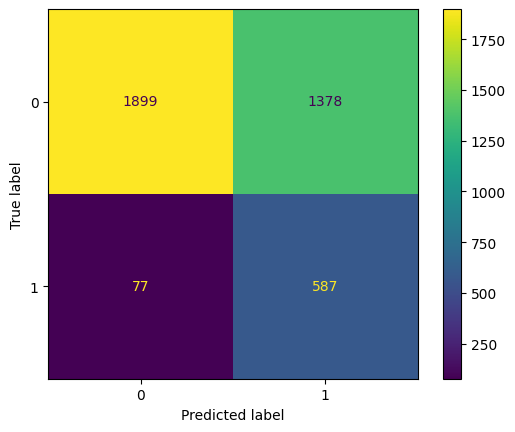

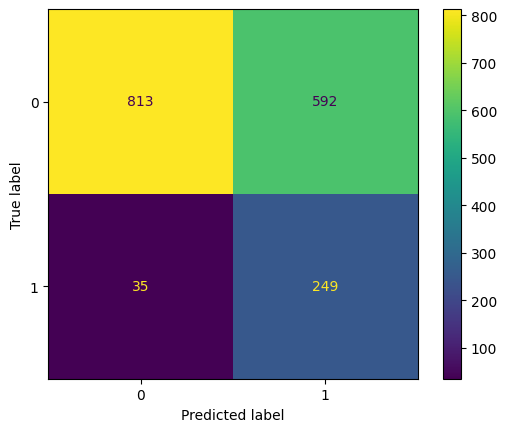

In [131]:
# Memprediksi nilai target pada data latih dan uji menggunakan model terbaik
y_train_pred = grid_svm.predict(X_train)
y_test_pred = grid_svm.predict(X_test)

# Menampilkan laporan klasifikasi untuk data latih
print("="*25,"TRAINING","="*25)
print(classification_report(y_train,y_train_pred))
print("\n")

# Menampilkan laporan klasifikasi untuk data uji
print("="*25,"TEST","="*25)
print(classification_report(y_test,y_test_pred))

# Confusion Matrix - train Set
cm_train = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(cm_train).plot()

# Confusion Matrix - test Set
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm_test).plot()

In [132]:
# Membuat variable baru
X_test_1 = X_test.copy()

X_test_1['Rot'] = y_test
X_test_1['Prediction'] = y_test_pred

In [133]:
False_negatif = X_test_1[(X_test_1['Rot'] == 1 ) &(X_test_1['Prediction'] == 0)]
False_negatif

,tenure,complain,day_since_last_order,cashback_amount,number_of_device_registered,satisfaction_score,prefered_order_cat,marital_status,Rot,Prediction
4688,14.0,1,4.0,192.96,4,3,Laptop & Accessory,Married,1,0
3988,10.0,0,3.0,214.26,4,4,Laptop & Accessory,Married,1,0
5612,14.0,0,2.0,192.28,4,3,Laptop & Accessory,Married,1,0
2678,9.0,0,7.0,173.14,3,4,Fashion,Married,1,0
3503,3.0,0,6.0,246.69,4,2,Grocery,Married,1,0
1165,0.0,0,7.0,153.46,3,5,Laptop & Accessory,Married,1,0
4768,19.0,0,4.0,176.60,4,1,Laptop & Accessory,Single,1,0
850,18.0,1,8.0,236.95,1,3,Grocery,Single,1,0
1208,9.0,0,7.0,173.14,3,4,Fashion,Married,1,0
1173,9.0,0,7.0,189.26,3,4,Laptop & Accessory,Married,1,0


In [134]:
False_negatif.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,35.0,10.742857,6.491365,0.00,8.50,11.00,15.000,21.00
complain,35.0,0.200000,0.405840,0.00,0.00,0.00,0.000,1.00
day_since_last_order,35.0,6.571429,7.417332,0.00,3.00,6.00,7.500,46.00
cashback_amount,35.0,200.306571,51.822720,120.86,167.62,192.28,224.905,323.59
number_of_device_registered,35.0,3.600000,1.116718,1.00,3.00,4.00,4.000,6.00
satisfaction_score,35.0,2.714286,1.341014,1.00,1.50,3.00,4.000,5.00
Rot,35.0,1.000000,0.000000,1.00,1.00,1.00,1.000,1.00
Prediction,35.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00


In [135]:
# Hitung rata-rata dari kolom-kolom numerik pada dataframe True_negative
true_negatif = X_test_1[(X_test_1['Rot'] == 0 ) &(X_test_1['Prediction'] == 0)]
true_negatif.head()

,tenure,complain,day_since_last_order,cashback_amount,number_of_device_registered,satisfaction_score,prefered_order_cat,marital_status,Rot,Prediction
1812,10.0,0,7.0,188.34,3,4,Fashion,Married,0,0
4622,8.0,0,8.0,178.37,2,1,Laptop & Accessory,Single,0,0
4418,25.0,0,1.0,152.23,4,1,Mobile Phone,Married,0,0
3559,20.0,0,4.0,315.81,4,4,Others,Divorced,0,0
681,25.0,0,0.0,204.45,3,4,Fashion,Single,0,0


In [136]:
true_negatif.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,813.0,15.797048,8.090430,0.0,9.00,15.00,22.00,51.00
complain,813.0,0.214022,0.410395,0.0,0.00,0.00,0.00,1.00
day_since_last_order,813.0,5.669127,3.904651,0.0,3.00,5.00,8.00,30.00
cashback_amount,813.0,197.697429,55.137558,0.0,155.62,179.05,234.99,324.73
number_of_device_registered,813.0,3.460025,1.053934,1.0,3.00,4.00,4.00,6.00
satisfaction_score,813.0,2.881919,1.455694,1.0,1.00,3.00,4.00,5.00
Rot,813.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
Prediction,813.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00


In [137]:
# Menghitung rata - rata
X_test2 = X_test_1.drop('Rot',axis=1)
X_test2.groupby('Prediction').describe().T

Prediction                                  0           1
tenure                      count  848.000000  841.000000
                            mean    15.588443    5.185493
                            std      8.090352    4.974825
                            min      0.000000    0.000000
                            25%      9.000000    1.000000
                            50%     15.000000    4.000000
                            75%     21.000000    9.000000
                            max     51.000000   22.000000
complain                    count  848.000000  841.000000
                            mean     0.213443    0.362663
                            std      0.409980    0.481055
                            min      0.000000    0.000000
                            25%      0.000000    0.000000
                            50%      0.000000    0.000000
                            75%      0.000000    1.000000
                            max      1.000000    1.000000
day_since_last_order        count  848.000000  841.000000
                            mean     5.706368    3.236623
                            std      4.105729    2.625859
                            min      0.000000    0.000000
                            25%      3.000000    1.000000
                            50%      5.000000    3.000000
                            75%      8.000000    4.000000
                            max     46.000000   15.000000
cashback_amount             count  848.000000  841.000000
                            mean   197.805118  155.765553
                            std     54.978161   29.759725
                            min      0.000000    0.000000
                            25%    155.620000  136.170000
                            50%    179.100000  150.520000
                            75%    234.960000  171.430000
                            max    324.730000  295.680000
number_of_device_registered count  848.000000  841.000000
                            mean     3.465802    3.926278
                            std      1.056273    0.879278
                            min      1.000000    1.000000
                            25%      3.000000    3.000000
                            50%      4.000000    4.000000
                            75%      4.000000    4.000000
                            max      6.000000    6.000000
satisfaction_score          count  848.000000  841.000000
                            mean     2.875000    3.266350
                            std      1.450787    1.313092
                            min      1.000000    1.000000
                            25%      1.000000    2.000000
                            50%      3.000000    3.000000
                            75%      4.000000    4.000000
                            max      5.000000    5.000000

In [138]:
# Menghitung rata - rata
X_test3 = X_test_1.drop('Prediction',axis=1)
X_test3.groupby('Rot').describe().T

Rot                                          0           1
tenure                      count  1405.000000  284.000000
                            mean     11.758007    3.732394
                            std       8.377053    5.376845
                            min       0.000000    0.000000
                            25%       5.000000    0.000000
                            50%      10.000000    1.000000
                            75%      17.000000    6.000000
                            max      51.000000   21.000000
complain                    count  1405.000000  284.000000
                            mean      0.236299    0.542254
                            std       0.424959    0.499091
                            min       0.000000    0.000000
                            25%       0.000000    0.000000
                            50%       0.000000    1.000000
                            75%       0.000000    1.000000
                            max       1.000000    1.000000
day_since_last_order        count  1405.000000  284.000000
                            mean      4.655516    3.591549
                            std       3.544514    4.091973
                            min       0.000000    0.000000
                            25%       2.000000    1.000000
                            50%       3.000000    3.000000
                            75%       7.000000    6.000000
                            max      30.000000   46.000000
cashback_amount             count  1405.000000  284.000000
                            mean    180.099794  160.906197
                            std      50.487729   36.858846
                            min       0.000000  110.090000
                            25%     147.650000  135.630000
                            50%     166.080000  150.535000
                            75%     199.800000  178.695000
                            max     324.730000  323.590000
number_of_device_registered count  1405.000000  284.000000
                            mean      3.640569    3.964789
                            std       0.982572    1.035838
                            min       1.000000    1.000000
                            25%       3.000000    3.000000
                            50%       4.000000    4.000000
                            75%       4.000000    5.000000
                            max       6.000000    6.000000
satisfaction_score          count  1405.000000  284.000000
                            mean      3.017082    3.330986
                            std       1.393307    1.390131
                            min       1.000000    1.000000
                            25%       2.000000    2.000000
                            50%       3.000000    3.000000
                            75%       4.000000    5.000000
                            max       5.000000    5.000000

In [46]:
# Mendefinisikan parameter grid untuk GridSearchCV
params = [

    {'preprocessing__num':[MinMaxScaler(),StandardScaler(),RobustScaler()],
     'model':[KNeighborsClassifier()],
     'model__n_neighbors': [3, 5, 10, 15, 20, 25],
     'model__metric': ['cosine', 'euclidean', 'manhattan'],
     'model__leaf_size': [10, 20, 30],
     'model__p': [1, 2]},
    
]


# Membuat objek GridSearchCV
grid_knn = GridSearchCV(pipe_svm, params, cv=3, verbose=3, scoring='recall', error_score='raise')

# Melakukan grid search untuk pemilihan model terbaik
grid_knn.fit(X_train,y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV 1/3] END model=KNeighborsClassifier(), model__leaf_size=10, model__metric=cosine, model__n_neighbors=3, model__p=1, preprocessing__num=MinMaxScaler();, score=0.747 total time=   0.1s
[CV 2/3] END model=KNeighborsClassifier(), model__leaf_size=10, model__metric=cosine, model__n_neighbors=3, model__p=1, preprocessing__num=MinMaxScaler();, score=0.757 total time=   0.1s
[CV 3/3] END model=KNeighborsClassifier(), model__leaf_size=10, model__metric=cosine, model__n_neighbors=3, model__p=1, preprocessing__num=MinMaxScaler();, score=0.701 total time=   0.1s
[CV 1/3] END model=KNeighborsClassifier(), model__leaf_size=10, model__metric=cosine, model__n_neighbors=3, model__p=1, preprocessing__num=StandardScaler();, score=0.769 total time=   0.1s
[CV 2/3] END model=KNeighborsClassifier(), model__leaf_size=10, model__metric=cosine, model__n_neighbors=3, model__p=1, preprocessing__num=StandardScaler();, score=0.716 total time=   0.1

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         ColumnTransformer(transformers=[('scaling',
                                                                                                          StandardScaler(),
                                                                                                          ['tenure',
                                                                                                           'cashback_amount']),
                                                                                                         ('cat_num',
                                                                                                          'passthrough',
                                                                                                          ['number_of_device_registered',
                                                                                                           'complain',
                                                                                                           'day_since_last_order',
                                                                                                           'satisfaction_score'])]),
                                                                         ['tenure',
                                                                          'cashback_amoun...
                                              sampling_strategy='minority')),
                                       ('tomek', TomekLinks()),
                                       ('model', SVC())]),
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__leaf_size': [10, 20, 30],
                          'model__metric': ['cosine', 'euclidean', 'manhattan'],
                          'model__n_neighbors': [3, 5, 10, 15, 20, 25],
                          'model__p': [1, 2],
                          'preprocessing__num': [MinMaxScaler(),
                                                 StandardScaler(),
                                                 RobustScaler()]}],
             scoring='recall', verbose=3)

In [63]:
if grid_knn.best_score_>cv_scores:
    print(f'Score Hypertuning : {grid_knn.best_score_}')
    print(f'Score Baseline : {cv_scores}')
    print('Model dengan score terbaik : Hypertuning')
else:
    print(f'Score Hypertuning : {grid_knn.best_score_}')
    print(f'Score Baseline : {cv_scores}')
    print('Model dengan score terbaik : Baseline')

Score Hypertuning : 0.7846670199611375
Score Baseline : 0.7876395534290271
Model dengan score terbaik : Baseline


========================= TRAINING =========================
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      3277
           1       0.49      0.92      0.64       664

    accuracy                           0.82      3941
   macro avg       0.73      0.86      0.76      3941
weighted avg       0.90      0.82      0.84      3941



========================= TEST =========================
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1405
           1       0.43      0.82      0.57       284

    accuracy                           0.79      1689
   macro avg       0.69      0.80      0.71      1689
weighted avg       0.87      0.79      0.81      1689



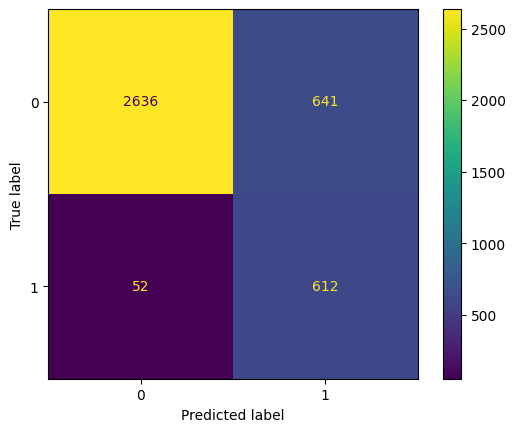

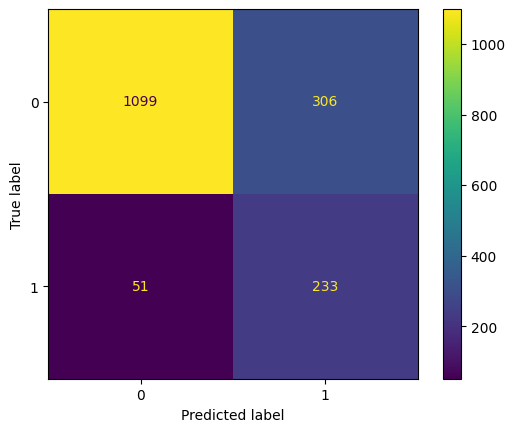

In [139]:
# Memprediksi nilai target pada data latih dan uji menggunakan model terbaik
y_train_pred = grid_knn.predict(X_train)
y_test_pred = grid_knn.predict(X_test)

# Menampilkan laporan klasifikasi untuk data latih
print("="*25,"TRAINING","="*25)
print(classification_report(y_train,y_train_pred))
print("\n")

# Menampilkan laporan klasifikasi untuk data uji
print("="*25,"TEST","="*25)
print(classification_report(y_test,y_test_pred))

# Confusion Matrix - train Set
cm_train = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(cm_train).plot()

# Confusion Matrix - test Set
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm_test).plot()

In [140]:
# Membuat variable baru
X_test_1 = X_test.copy()

X_test_1['Rot'] = y_test
X_test_1['Prediction'] = y_test_pred

In [141]:
False_negatif = X_test_1[(X_test_1['Rot'] == 1 ) &(X_test_1['Prediction'] == 0)]
False_negatif

,tenure,complain,day_since_last_order,cashback_amount,number_of_device_registered,satisfaction_score,prefered_order_cat,marital_status,Rot,Prediction
4688,14.0,1,4.0,192.96,4,3,Laptop & Accessory,Married,1,0
2134,7.0,0,6.0,204.82,4,5,Fashion,Married,1,0
3491,14.0,1,1.0,172.28,4,3,Laptop & Accessory,Single,1,0
2181,0.0,0,10.0,173.36,4,5,Fashion,Married,1,0
3988,10.0,0,3.0,214.26,4,4,Laptop & Accessory,Married,1,0
887,9.0,0,0.0,113.59,5,3,Mobile Phone,Single,1,0
5612,14.0,0,2.0,192.28,4,3,Laptop & Accessory,Married,1,0
2678,9.0,0,7.0,173.14,3,4,Fashion,Married,1,0
1097,9.0,0,0.0,115.55,5,3,Mobile Phone,Married,1,0
1208,9.0,0,7.0,173.14,3,4,Fashion,Married,1,0


In [142]:
False_negatif.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,51.0,8.588235,6.512070,0.00,1.00,9.00,13.50,21.00
complain,51.0,0.156863,0.367290,0.00,0.00,0.00,0.00,1.00
day_since_last_order,51.0,4.823529,6.743014,0.00,1.00,3.00,7.00,46.00
cashback_amount,51.0,174.032941,52.078511,113.59,138.49,167.96,196.19,323.59
number_of_device_registered,51.0,3.725490,0.896179,1.00,3.00,4.00,4.00,6.00
satisfaction_score,51.0,3.333333,1.336663,1.00,2.50,3.00,5.00,5.00
Rot,51.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
Prediction,51.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00


In [143]:
# Hitung rata-rata dari kolom-kolom numerik pada dataframe True_negative
true_negatif = X_test_1[(X_test_1['Rot'] == 0 ) &(X_test_1['Prediction'] == 0)]
true_negatif.head()

,tenure,complain,day_since_last_order,cashback_amount,number_of_device_registered,satisfaction_score,prefered_order_cat,marital_status,Rot,Prediction
1812,10.0,0,7.0,188.34,3,4,Fashion,Married,0,0
4622,8.0,0,8.0,178.37,2,1,Laptop & Accessory,Single,0,0
2688,9.0,0,2.0,120.62,3,5,Mobile,Single,0,0
4418,25.0,0,1.0,152.23,4,1,Mobile Phone,Married,0,0
3559,20.0,0,4.0,315.81,4,4,Others,Divorced,0,0


In [144]:
true_negatif.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,1099.0,13.373066,8.156319,0.0,8.000,12.00,19.00,51.00
complain,1099.0,0.183803,0.387500,0.0,0.000,0.00,0.00,1.00
day_since_last_order,1099.0,4.964513,3.644945,0.0,2.000,4.00,8.00,30.00
cashback_amount,1099.0,185.507407,52.344955,0.0,150.735,170.53,205.95,324.73
number_of_device_registered,1099.0,3.600546,0.990685,1.0,3.000,4.00,4.00,6.00
satisfaction_score,1099.0,2.940855,1.396442,1.0,2.000,3.00,4.00,5.00
Rot,1099.0,0.000000,0.000000,0.0,0.000,0.00,0.00,0.00
Prediction,1099.0,0.000000,0.000000,0.0,0.000,0.00,0.00,0.00


In [145]:
# Menghitung rata - rata
X_test2 = X_test_1.drop('Rot',axis=1)
X_test2.groupby('Prediction').describe().T

Prediction                                   0           1
tenure                      count  1150.000000  539.000000
                            mean     13.160870    4.536178
                            std       8.147959    5.839241
                            min       0.000000    0.000000
                            25%       7.250000    1.000000
                            50%      12.000000    1.000000
                            75%      19.000000    8.000000
                            max      51.000000   31.000000
complain                    count  1150.000000  539.000000
                            mean      0.182609    0.512059
                            std       0.386513    0.500319
                            min       0.000000    0.000000
                            25%       0.000000    0.000000
                            50%       0.000000    1.000000
                            75%       0.000000    1.000000
                            max       1.000000    1.000000
day_since_last_order        count  1150.000000  539.000000
                            mean      4.958261    3.448980
                            std       3.830844    3.032460
                            min       0.000000    0.000000
                            25%       2.000000    1.000000
                            50%       4.000000    3.000000
                            75%       8.000000    4.000000
                            max      46.000000   17.000000
cashback_amount             count  1150.000000  539.000000
                            mean    184.998539  159.534787
                            std      52.363955   35.073510
                            min       0.000000   56.000000
                            25%     150.252500  136.070000
                            50%     170.380000  150.390000
                            75%     204.970000  172.550000
                            max     324.730000  315.680000
number_of_device_registered count  1150.000000  539.000000
                            mean      3.606087    3.884972
                            std       0.986664    0.998948
                            min       1.000000    1.000000
                            25%       3.000000    3.000000
                            50%       4.000000    4.000000
                            75%       4.000000    4.000000
                            max       6.000000    6.000000
satisfaction_score          count  1150.000000  539.000000
                            mean      2.958261    3.307978
                            std       1.395628    1.372104
                            min       1.000000    1.000000
                            25%       2.000000    2.000000
                            50%       3.000000    3.000000
                            75%       4.000000    5.000000
                            max       5.000000    5.000000

In [146]:
# Menghitung rata - rata
X_test3 = X_test_1.drop('Prediction',axis=1)
X_test3.groupby('Rot').describe().T

Rot                                          0           1
tenure                      count  1405.000000  284.000000
                            mean     11.758007    3.732394
                            std       8.377053    5.376845
                            min       0.000000    0.000000
                            25%       5.000000    0.000000
                            50%      10.000000    1.000000
                            75%      17.000000    6.000000
                            max      51.000000   21.000000
complain                    count  1405.000000  284.000000
                            mean      0.236299    0.542254
                            std       0.424959    0.499091
                            min       0.000000    0.000000
                            25%       0.000000    0.000000
                            50%       0.000000    1.000000
                            75%       0.000000    1.000000
                            max       1.000000    1.000000
day_since_last_order        count  1405.000000  284.000000
                            mean      4.655516    3.591549
                            std       3.544514    4.091973
                            min       0.000000    0.000000
                            25%       2.000000    1.000000
                            50%       3.000000    3.000000
                            75%       7.000000    6.000000
                            max      30.000000   46.000000
cashback_amount             count  1405.000000  284.000000
                            mean    180.099794  160.906197
                            std      50.487729   36.858846
                            min       0.000000  110.090000
                            25%     147.650000  135.630000
                            50%     166.080000  150.535000
                            75%     199.800000  178.695000
                            max     324.730000  323.590000
number_of_device_registered count  1405.000000  284.000000
                            mean      3.640569    3.964789
                            std       0.982572    1.035838
                            min       1.000000    1.000000
                            25%       3.000000    3.000000
                            50%       4.000000    4.000000
                            75%       4.000000    5.000000
                            max       6.000000    6.000000
satisfaction_score          count  1405.000000  284.000000
                            mean      3.017082    3.330986
                            std       1.393307    1.390131
                            min       1.000000    1.000000
                            25%       2.000000    2.000000
                            50%       3.000000    3.000000
                            75%       4.000000    5.000000
                            max       5.000000    5.000000

In [49]:
# Mendefinisikan parameter grid untuk GridSearchCV
params = [

    {'preprocessing__num':[MinMaxScaler(),StandardScaler(),RobustScaler()],
     'model':[RandomForestClassifier()],
     'model__n_estimators': [100, 200],
     'model__criterion': ['gini', 'entropy'],
     'model__max_depth': [20, 30],
     'model__min_samples_split': [2, 5],
     'model__min_samples_leaf': [1, 2],
     'model__class_weight': [None, 'balanced']}
    
]


# Membuat objek GridSearchCV
grid_forest = GridSearchCV(pipe_svm, params, cv=3, verbose=3, scoring='recall', error_score='raise')

# Melakukan grid search untuk pemilihan model terbaik
grid_forest.fit(X_train,y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END model=RandomForestClassifier(), model__class_weight=None, model__criterion=gini, model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num=MinMaxScaler();, score=0.710 total time=   0.4s
[CV 2/3] END model=RandomForestClassifier(), model__class_weight=None, model__criterion=gini, model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num=MinMaxScaler();, score=0.752 total time=   0.4s
[CV 3/3] END model=RandomForestClassifier(), model__class_weight=None, model__criterion=gini, model__max_depth=20, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num=MinMaxScaler();, score=0.715 total time=   0.4s
[CV 1/3] END model=RandomForestClassifier(), model__class_weight=None, model__criterion=gini, model__max_depth=20, model__min_samples_leaf=1, model__mi

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         ColumnTransformer(transformers=[('scaling',
                                                                                                          StandardScaler(),
                                                                                                          ['tenure',
                                                                                                           'cashback_amount']),
                                                                                                         ('cat_num',
                                                                                                          'passthrough',
                                                                                                          ['number_of_device_registered',
                                                                                                           'complain',
                                                                                                           'day_since_last_order',
                                                                                                           'satisfaction_score'])]),
                                                                         ['tenure',
                                                                          'cashback_amoun...
                                       ('model', SVC())]),
             param_grid=[{'model': [RandomForestClassifier()],
                          'model__class_weight': [None, 'balanced'],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [20, 30],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [2, 5],
                          'model__n_estimators': [100, 200],
                          'preprocessing__num': [MinMaxScaler(),
                                                 StandardScaler(),
                                                 RobustScaler()]}],
             scoring='recall', verbose=3)

In [50]:
if grid_forest.best_score_>cv_scores:
    print(f'Score Hypertuning : {grid_forest.best_score_}')
    print(f'Score Baseline : {cv_scores}')
    print('Model dengan score terbaik : Hypertuning')
else:
    print(f'Score Hypertuning : {grid_forest.best_score_}')
    print(f'Score Baseline : {cv_scores}')
    print('Model dengan score terbaik : Baseline')

Score Hypertuning : 0.7454717160599514
Score Baseline : 0.7876395534290271
Model dengan score terbaik : Baseline


In [80]:
feature_names_forest = numeric + list(preprocessing.named_transformers_['cat'].named_transformers_['onehot'].get_feature_names_out(list_categoric_encoded)) 
feature_importances_forest= grid_forest.best_estimator_.named_steps['model'].feature_importances_.tolist()
params = {
    'feature name': feature_names_forest, 
    'Feature Importance': feature_importances_forest, 
}

# print('Intercept : ', intercept)
coef = pd.DataFrame(params)
coef.sort_values(by="Feature Importance")

,feature name,Feature Importance
10,prefered_order_cat_Others,0.004591
6,prefered_order_cat_Grocery,0.006367
8,prefered_order_cat_Mobile,0.010871
9,prefered_order_cat_Mobile Phone,0.012235
11,marital_status_Married,0.018934
7,prefered_order_cat_Laptop & Accessory,0.026696
12,marital_status_Single,0.028368
3,complain,0.078756
2,number_of_device_registered,0.098663
5,satisfaction_score,0.103269


Text(0.5, 0, 'Feature Importance')

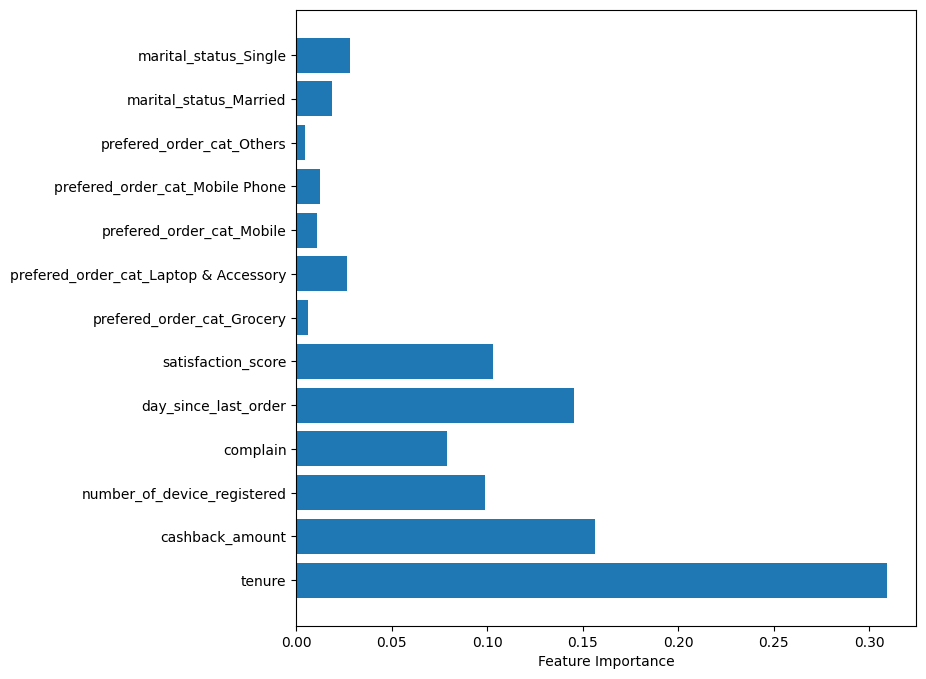

In [81]:
plt.figure(figsize=(8,8))
plt.barh(feature_names_forest, feature_importances_forest)
plt.xlabel("Feature Importance")

========================= TRAINING =========================
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3277
           1       0.92      0.94      0.93       664

    accuracy                           0.98      3941
   macro avg       0.96      0.96      0.96      3941
weighted avg       0.98      0.98      0.98      3941



========================= TEST =========================
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1405
           1       0.73      0.77      0.75       284

    accuracy                           0.91      1689
   macro avg       0.84      0.85      0.85      1689
weighted avg       0.91      0.91      0.91      1689



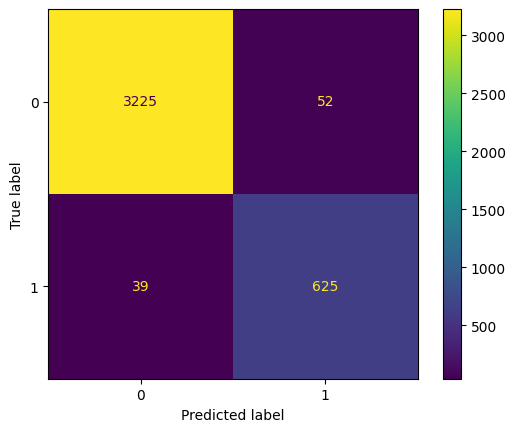

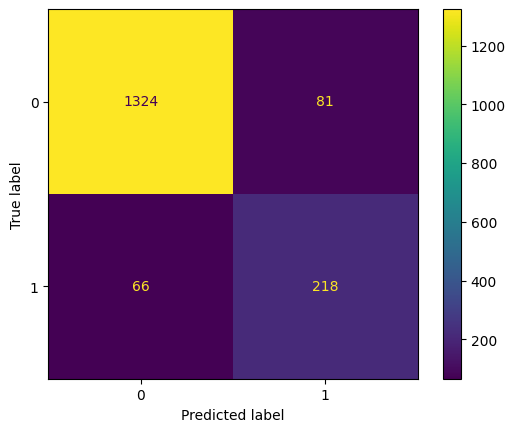

In [147]:
# Memprediksi nilai target pada data latih dan uji menggunakan model terbaik
y_train_pred = grid_forest.predict(X_train)
y_test_pred = grid_forest.predict(X_test)

# Menampilkan laporan klasifikasi untuk data latih
print("="*25,"TRAINING","="*25)
print(classification_report(y_train,y_train_pred))
print("\n")

# Menampilkan laporan klasifikasi untuk data uji
print("="*25,"TEST","="*25)
print(classification_report(y_test,y_test_pred))

# Confusion Matrix - train Set
cm_train = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(cm_train).plot()

# Confusion Matrix - test Set
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm_test).plot()

In [148]:
# Membuat variable baru
X_test_1 = X_test.copy()

X_test_1['Rot'] = y_test
X_test_1['Prediction'] = y_test_pred


In [149]:
False_negatif = X_test_1[(X_test_1['Rot'] == 1 ) &(X_test_1['Prediction'] == 0)]
False_negatif

,tenure,complain,day_since_last_order,cashback_amount,number_of_device_registered,satisfaction_score,prefered_order_cat,marital_status,Rot,Prediction
4688,14.0,1,4.0,192.96,4,3,Laptop & Accessory,Married,1,0
2134,7.0,0,6.0,204.82,4,5,Fashion,Married,1,0
3491,14.0,1,1.0,172.28,4,3,Laptop & Accessory,Single,1,0
24,14.0,0,3.0,206.50,5,2,Fashion,Single,1,0
3442,1.0,0,15.0,152.43,2,5,Mobile Phone,Single,1,0
...,...,...,...,...,...,...,...,...,...,...
1434,9.0,0,7.0,196.19,4,1,Fashion,Single,1,0
422,5.0,1,2.0,127.59,2,3,Mobile,Married,1,0
1327,13.0,0,1.0,167.28,3,3,Laptop & Accessory,Married,1,0
2815,5.0,1,6.0,184.93,4,2,Laptop & Accessory,Single,1,0


In [150]:
False_negatif.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,66.0,8.393939,6.665361,0.00,1.2500,9.00,13.75,21.00
complain,66.0,0.272727,0.448775,0.00,0.0000,0.00,1.00,1.00
day_since_last_order,66.0,4.257576,3.361825,0.00,2.0000,3.00,6.75,15.00
cashback_amount,66.0,174.422424,48.645401,110.81,146.1625,167.62,196.19,323.59
number_of_device_registered,66.0,3.590909,0.960405,1.00,3.0000,3.50,4.00,6.00
satisfaction_score,66.0,3.015152,1.451709,1.00,2.0000,3.00,4.00,5.00
Rot,66.0,1.000000,0.000000,1.00,1.0000,1.00,1.00,1.00
Prediction,66.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00


In [151]:
# Hitung rata-rata dari kolom-kolom numerik pada dataframe True_negative
true_negatif = X_test_1[(X_test_1['Rot'] == 0 ) &(X_test_1['Prediction'] == 0)]
true_negatif.head()

,tenure,complain,day_since_last_order,cashback_amount,number_of_device_registered,satisfaction_score,prefered_order_cat,marital_status,Rot,Prediction
1812,10.0,0,7.0,188.34,3,4,Fashion,Married,0,0
4622,8.0,0,8.0,178.37,2,1,Laptop & Accessory,Single,0,0
2688,9.0,0,2.0,120.62,3,5,Mobile,Single,0,0
4418,25.0,0,1.0,152.23,4,1,Mobile Phone,Married,0,0
3559,20.0,0,4.0,315.81,4,4,Others,Divorced,0,0


In [152]:
true_negatif.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,1324.0,12.322508,8.241686,0.0,6.0000,11.00,18.00,51.00
complain,1324.0,0.228097,0.419764,0.0,0.0000,0.00,0.00,1.00
day_since_last_order,1324.0,4.791541,3.565017,0.0,2.0000,3.00,8.00,30.00
cashback_amount,1324.0,181.620076,50.751705,0.0,148.1325,167.59,202.22,324.73
number_of_device_registered,1324.0,3.611782,0.991443,1.0,3.0000,4.00,4.00,6.00
satisfaction_score,1324.0,2.991692,1.394544,1.0,2.0000,3.00,4.00,5.00
Rot,1324.0,0.000000,0.000000,0.0,0.0000,0.00,0.00,0.00
Prediction,1324.0,0.000000,0.000000,0.0,0.0000,0.00,0.00,0.00


In [153]:
# Menghitung rata - rata
X_test2 = X_test_1.drop('Rot',axis=1)
X_test2.groupby('Prediction').describe().T

Prediction                                   0           1
tenure                      count  1390.000000  299.000000
                            mean     12.135971    2.377926
                            std       8.214340    4.000962
                            min       0.000000    0.000000
                            25%       6.000000    0.000000
                            50%      10.500000    1.000000
                            75%      18.000000    1.000000
                            max      51.000000   21.000000
complain                    count  1390.000000  299.000000
                            mean      0.230216    0.555184
                            std       0.421122    0.497779
                            min       0.000000    0.000000
                            25%       0.000000    0.000000
                            50%       0.000000    1.000000
                            75%       0.000000    1.000000
                            max       1.000000    1.000000
day_since_last_order        count  1390.000000  299.000000
                            mean      4.766187    3.130435
                            std       3.556295    3.851224
                            min       0.000000    0.000000
                            25%       2.000000    1.000000
                            50%       3.000000    2.000000
                            75%       8.000000    4.000000
                            max      30.000000   46.000000
cashback_amount             count  1390.000000  299.000000
                            mean    181.278317  156.390334
                            std      50.659931   33.434914
                            min       0.000000   56.000000
                            25%     148.102500  136.135000
                            50%     167.590000  149.040000
                            75%     201.952500  166.400000
                            max     324.730000  308.030000
number_of_device_registered count  1390.000000  299.000000
                            mean      3.610791    4.086957
                            std       0.989665    0.947868
                            min       1.000000    1.000000
                            25%       3.000000    4.000000
                            50%       4.000000    4.000000
                            75%       4.000000    5.000000
                            max       6.000000    6.000000
satisfaction_score          count  1390.000000  299.000000
                            mean      2.992806    3.428094
                            std       1.396779    1.345143
                            min       1.000000    1.000000
                            25%       2.000000    3.000000
                            50%       3.000000    3.000000
                            75%       4.000000    5.000000
                            max       5.000000    5.000000

In [154]:
# Menghitung rata - rata
X_test3 = X_test_1.drop('Prediction',axis=1)
X_test3.groupby('Rot').describe().T

Rot                                          0           1
tenure                      count  1405.000000  284.000000
                            mean     11.758007    3.732394
                            std       8.377053    5.376845
                            min       0.000000    0.000000
                            25%       5.000000    0.000000
                            50%      10.000000    1.000000
                            75%      17.000000    6.000000
                            max      51.000000   21.000000
complain                    count  1405.000000  284.000000
                            mean      0.236299    0.542254
                            std       0.424959    0.499091
                            min       0.000000    0.000000
                            25%       0.000000    0.000000
                            50%       0.000000    1.000000
                            75%       0.000000    1.000000
                            max       1.000000    1.000000
day_since_last_order        count  1405.000000  284.000000
                            mean      4.655516    3.591549
                            std       3.544514    4.091973
                            min       0.000000    0.000000
                            25%       2.000000    1.000000
                            50%       3.000000    3.000000
                            75%       7.000000    6.000000
                            max      30.000000   46.000000
cashback_amount             count  1405.000000  284.000000
                            mean    180.099794  160.906197
                            std      50.487729   36.858846
                            min       0.000000  110.090000
                            25%     147.650000  135.630000
                            50%     166.080000  150.535000
                            75%     199.800000  178.695000
                            max     324.730000  323.590000
number_of_device_registered count  1405.000000  284.000000
                            mean      3.640569    3.964789
                            std       0.982572    1.035838
                            min       1.000000    1.000000
                            25%       3.000000    3.000000
                            50%       4.000000    4.000000
                            75%       4.000000    5.000000
                            max       6.000000    6.000000
satisfaction_score          count  1405.000000  284.000000
                            mean      3.017082    3.330986
                            std       1.393307    1.390131
                            min       1.000000    1.000000
                            25%       2.000000    2.000000
                            50%       3.000000    3.000000
                            75%       4.000000    5.000000
                            max       5.000000    5.000000

In [52]:
params = {
    'preprocessing__num':[MinMaxScaler(),StandardScaler(),RobustScaler()],
    'model':[XGBClassifier()],
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.05],
    'model__booster': ['gbtree', 'gblinear'],
    'model__gamma': [0, 0.5],
    'model__reg_alpha': [0, 0.5],
    'model__reg_lambda': [0.5, 1],
    'model__base_score': [0.5, 1]

}

# Membuat objek GridSearchCV
grid_xgb = GridSearchCV(pipe_svm, params, cv=3, verbose=3, scoring='recall')

# Melakukan grid search untuk pemilihan model terbaik
grid_xgb.fit(X_train,y_train)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
[CV 1/3] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), model__base_score=0.5, model__booster=gbtree, model__gamma=0, model__learning_rate=0.01, model__n_estimators=100, model__reg_alpha=0, model__reg_lambda=0.5, p

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         ColumnTransformer(transformers=[('scaling',
                                                                                                          StandardScaler(),
                                                                                                          ['tenure',
                                                                                                           'cashback_amount']),
                                                                                                         ('cat_num',
                                                                                                          'passthrough',
                                                                                                          ['number_of_device_registered',
                                                                                                           'complain',
                                                                                                           'day_since_last_order',
                                                                                                           'satisfaction_score'])]),
                                                                         ['tenure',
                                                                          'cashback_amount',
                                                                          'number_of_device...
                                                 num_parallel_tree=None,
                                                 random_state=None, ...)],
                         'model__base_score': [0.5, 1],
                         'model__booster': ['gbtree', 'gblinear'],
                         'model__gamma': [0, 0.5],
                         'model__learning_rate': [0.01, 0.05],
                         'model__n_estimators': [100, 200],
                         'model__reg_alpha': [0, 0.5],
                         'model__reg_lambda': [0.5, 1],
                         'preprocessing__num': [MinMaxScaler(),
                                                StandardScaler(),
                                                RobustScaler()]},
             scoring='recall', verbose=3)

In [53]:
if grid_xgb.best_score_>cv_scores:
    print(f'Score Hypertuning : {grid_xgb.best_score_}')
    print(f'Score Baseline : {cv_scores}')
    print('Model dengan score terbaik : Hypertuning')
else:
    print(f'Score Hypertuning : {grid_xgb.best_score_}')
    print(f'Score Baseline : {cv_scores}')
    print('Model dengan score terbaik : Baseline')

Score Hypertuning : 0.8418735477559007
Score Baseline : 0.7876395534290271
Model dengan score terbaik : Hypertuning


In [82]:
feature_names_xgb = numeric + list(preprocessing.named_transformers_['cat'].named_transformers_['onehot'].get_feature_names_out(list_categoric_encoded)) 
feature_importances_xgb= grid_xgb.best_estimator_.named_steps['model'].feature_importances_.tolist()
params = {
    'feature name': feature_names_xgb,
    'Feature Importance': feature_importances_xgb
}

# print('Intercept : ', intercept)
coef = pd.DataFrame(params)
coef.sort_values(by="Feature Importance")

,feature name,Feature Importance
3,complain,-1.113245
5,satisfaction_score,-0.571926
2,number_of_device_registered,-0.526594
12,marital_status_Single,-0.414629
9,prefered_order_cat_Mobile Phone,-0.295737
8,prefered_order_cat_Mobile,-0.194611
10,prefered_order_cat_Others,0.048767
6,prefered_order_cat_Grocery,0.142439
7,prefered_order_cat_Laptop & Accessory,0.429281
11,marital_status_Married,0.434160


Text(0.5, 0, 'Feature Importance')

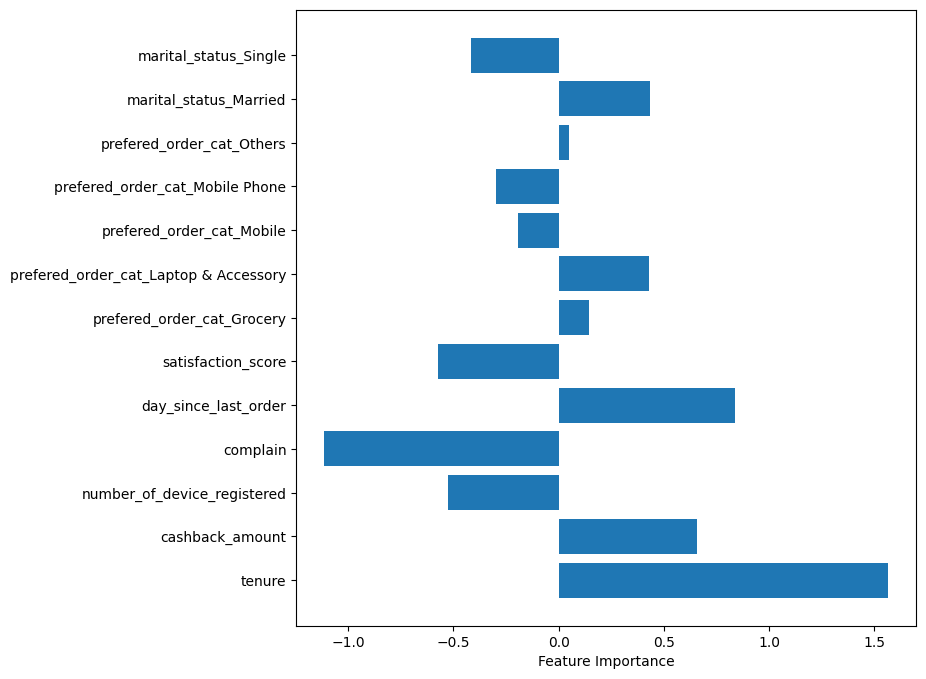

In [83]:
plt.figure(figsize=(8,8))
plt.barh(feature_names_xgb, feature_importances_xgb)
plt.xlabel("Feature Importance")

========================= TRAINING =========================
              precision    recall  f1-score   support

           0       0.96      0.66      0.78      3277
           1       0.34      0.86      0.48       664

    accuracy                           0.69      3941
   macro avg       0.65      0.76      0.63      3941
weighted avg       0.85      0.69      0.73      3941



========================= TEST =========================
              precision    recall  f1-score   support

           0       0.95      0.66      0.78      1405
           1       0.33      0.83      0.47       284

    accuracy                           0.69      1689
   macro avg       0.64      0.74      0.62      1689
weighted avg       0.85      0.69      0.73      1689



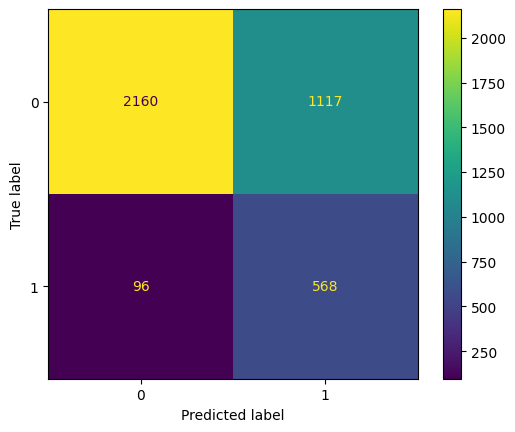

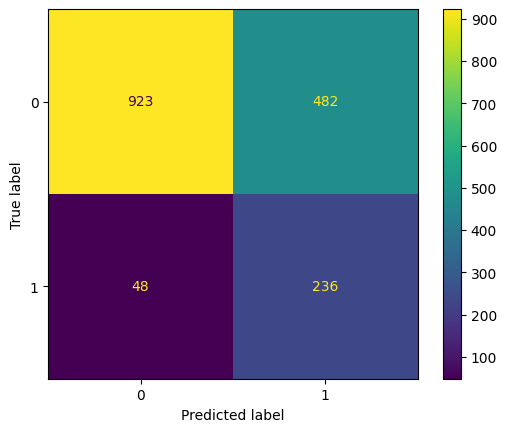

In [164]:
# Memprediksi nilai target pada data latih dan uji menggunakan model terbaik
y_train_pred = grid_xgb.predict(X_train)
y_test_pred = grid_xgb.predict(X_test)

# Menampilkan laporan klasifikasi untuk data latih
print("="*25,"TRAINING","="*25)
print(classification_report(y_train,y_train_pred))
print("\n")

# Menampilkan laporan klasifikasi untuk data uji
print("="*25,"TEST","="*25)
print(classification_report(y_test,y_test_pred))

# Confusion Matrix - train Set
cm_train = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(cm_train).plot()

# Confusion Matrix - test Set
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm_test).plot()

In [165]:
# Membuat variable baru
X_test_1 = X_test.copy()

X_test_1['Rot'] = y_test
X_test_1['Prediction'] = y_test_pred

In [166]:
False_negatif = X_test_1[(X_test_1['Rot'] == 1 ) &(X_test_1['Prediction'] == 0)]
False_negatif

,tenure,complain,day_since_last_order,cashback_amount,number_of_device_registered,satisfaction_score,prefered_order_cat,marital_status,Rot,Prediction
4688,14.0,1,4.0,192.96,4,3,Laptop & Accessory,Married,1,0
2134,7.0,0,6.0,204.82,4,5,Fashion,Married,1,0
24,14.0,0,3.0,206.50,5,2,Fashion,Single,1,0
3442,1.0,0,15.0,152.43,2,5,Mobile Phone,Single,1,0
2181,0.0,0,10.0,173.36,4,5,Fashion,Married,1,0
4998,6.0,1,15.0,262.58,4,5,Grocery,Single,1,0
3988,10.0,0,3.0,214.26,4,4,Laptop & Accessory,Married,1,0
4599,1.0,0,3.0,223.24,4,3,Fashion,Married,1,0
5612,14.0,0,2.0,192.28,4,3,Laptop & Accessory,Married,1,0
2678,9.0,0,7.0,173.14,3,4,Fashion,Married,1,0


In [167]:
False_negatif.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,48.0,9.604167,6.558216,0.00,3.7500,9.000,14.25,21.00
complain,48.0,0.166667,0.376622,0.00,0.0000,0.000,0.00,1.00
day_since_last_order,48.0,7.354167,6.833863,0.00,3.7500,7.000,9.00,46.00
cashback_amount,48.0,204.851042,46.335300,120.86,175.6325,201.465,228.34,323.59
number_of_device_registered,48.0,3.791667,1.009705,1.00,3.0000,4.000,4.00,6.00
satisfaction_score,48.0,2.937500,1.420312,1.00,2.0000,3.000,4.00,5.00
Rot,48.0,1.000000,0.000000,1.00,1.0000,1.000,1.00,1.00
Prediction,48.0,0.000000,0.000000,0.00,0.0000,0.000,0.00,0.00


In [168]:
# Hitung rata-rata dari kolom-kolom numerik pada dataframe True_negative
true_negatif = X_test_1[(X_test_1['Rot'] == 0 ) &(X_test_1['Prediction'] == 0)]
true_negatif.head()

,tenure,complain,day_since_last_order,cashback_amount,number_of_device_registered,satisfaction_score,prefered_order_cat,marital_status,Rot,Prediction
1812,10.0,0,7.0,188.34,3,4,Fashion,Married,0,0
4622,8.0,0,8.0,178.37,2,1,Laptop & Accessory,Single,0,0
4418,25.0,0,1.0,152.23,4,1,Mobile Phone,Married,0,0
3559,20.0,0,4.0,315.81,4,4,Others,Divorced,0,0
681,25.0,0,0.0,204.45,3,4,Fashion,Single,0,0


In [169]:
true_negatif.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,923.0,15.081257,7.929250,0.0,9.00,14.00,21.00,51.00
complain,923.0,0.138678,0.345798,0.0,0.00,0.00,0.00,1.00
day_since_last_order,923.0,5.497291,3.784135,0.0,3.00,4.00,8.00,30.00
cashback_amount,923.0,194.470238,53.588457,0.0,154.86,178.21,227.42,324.73
number_of_device_registered,923.0,3.569881,0.990323,1.0,3.00,4.00,4.00,6.00
satisfaction_score,923.0,2.897075,1.410844,1.0,1.00,3.00,4.00,5.00
Rot,923.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
Prediction,923.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00


In [170]:
# Menghitung rata - rata
X_test2 = X_test_1.drop('Rot',axis=1)
X_test2.groupby('Prediction').describe().T

Prediction                                  0           1
tenure                      count  971.000000  718.000000
                            mean    14.810505    4.455432
                            std      7.953417    4.768574
                            min      0.000000    0.000000
                            25%      9.000000    1.000000
                            50%     14.000000    2.000000
                            75%     20.000000    8.000000
                            max     51.000000   22.000000
complain                    count  971.000000  718.000000
                            mean     0.140062    0.487465
                            std      0.347230    0.500191
                            min      0.000000    0.000000
                            25%      0.000000    0.000000
                            50%      0.000000    0.000000
                            75%      0.000000    1.000000
                            max      1.000000    1.000000
day_since_last_order        count  971.000000  718.000000
                            mean     5.589083    2.972145
                            std      4.004513    2.438488
                            min      0.000000    0.000000
                            25%      3.000000    1.000000
                            50%      5.000000    3.000000
                            75%      8.000000    4.000000
                            max     46.000000   12.000000
cashback_amount             count  971.000000  718.000000
                            mean   194.983399  152.379791
                            std     53.279581   27.634586
                            min      0.000000    0.000000
                            25%    155.615000  134.497500
                            50%    179.100000  148.800000
                            75%    227.540000  164.022500
                            max    324.730000  295.680000
number_of_device_registered count  971.000000  718.000000
                            mean     3.580844    3.849582
                            std      0.991928    0.987901
                            min      1.000000    1.000000
                            25%      3.000000    3.000000
                            50%      4.000000    4.000000
                            75%      4.000000    4.000000
                            max      6.000000    6.000000
satisfaction_score          count  971.000000  718.000000
                            mean     2.899073    3.300836
                            std      1.410604    1.346010
                            min      1.000000    1.000000
                            25%      1.000000    2.000000
                            50%      3.000000    3.000000
                            75%      4.000000    4.000000
                            max      5.000000    5.000000

In [161]:
# Menghitung rata - rata
X_test3 = X_test_1.drop('Prediction',axis=1)
X_test3.groupby('Rot').describe().T

Rot                                          0           1
tenure                      count  1405.000000  284.000000
                            mean     11.758007    3.732394
                            std       8.377053    5.376845
                            min       0.000000    0.000000
                            25%       5.000000    0.000000
                            50%      10.000000    1.000000
                            75%      17.000000    6.000000
                            max      51.000000   21.000000
complain                    count  1405.000000  284.000000
                            mean      0.236299    0.542254
                            std       0.424959    0.499091
                            min       0.000000    0.000000
                            25%       0.000000    0.000000
                            50%       0.000000    1.000000
                            75%       0.000000    1.000000
                            max       1.000000    1.000000
day_since_last_order        count  1405.000000  284.000000
                            mean      4.655516    3.591549
                            std       3.544514    4.091973
                            min       0.000000    0.000000
                            25%       2.000000    1.000000
                            50%       3.000000    3.000000
                            75%       7.000000    6.000000
                            max      30.000000   46.000000
cashback_amount             count  1405.000000  284.000000
                            mean    180.099794  160.906197
                            std      50.487729   36.858846
                            min       0.000000  110.090000
                            25%     147.650000  135.630000
                            50%     166.080000  150.535000
                            75%     199.800000  178.695000
                            max     324.730000  323.590000
number_of_device_registered count  1405.000000  284.000000
                            mean      3.640569    3.964789
                            std       0.982572    1.035838
                            min       1.000000    1.000000
                            25%       3.000000    3.000000
                            50%       4.000000    4.000000
                            75%       4.000000    5.000000
                            max       6.000000    6.000000
satisfaction_score          count  1405.000000  284.000000
                            mean      3.017082    3.330986
                            std       1.393307    1.390131
                            min       1.000000    1.000000
                            25%       2.000000    2.000000
                            50%       3.000000    3.000000
                            75%       4.000000    5.000000
                            max       5.000000    5.000000

In [55]:
joblib.dump(grid_tree, "model_tree.pkl")
joblib.dump(grid_logreg, "model_logreg.pkl")
joblib.dump(grid_svm, "model_svm.pkl")
joblib.dump(grid_knn, "model_knn.pkl")
joblib.dump(grid_forest, "model_forest.pkl")
joblib.dump(grid_xgb, "model_xgb.pkl")


['model_xgb.pkl']